In [1]:
# imported packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import sklearn as sk
import plotly.express as px

import sys 

%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.preprocessing import scale
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import reciprocal, uniform

In [2]:
income_data = pd.read_csv('adult.csv')
income_data.head()
income_data=pd.get_dummies(income_data,columns=[
'income'],drop_first=True)
income_data = income_data.rename({'income_>50K':'income'},axis=1)
income_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [3]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  uint8 
dtypes: int64(6), object(8), uint8(1)
memory usage: 5.3+ MB


In [4]:
income_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
income_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Missing values 

In [6]:
income_data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
print(f"{income_data[income_data['capital-gain'] == 99999].shape[0]} outlier in the capital-gain")
print(f"{income_data[income_data['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week")

244 outlier in the capital-gain
137 outlier in the hours-per-week


In [8]:
income_data['capital-gain'].replace(99999, np.mean(income_data['capital-gain'].values), inplace=True)
income_data['hours-per-week'].replace(99, np.mean(income_data['hours-per-week'].values), inplace=True)

#this replaces with the mean, could remove it and use smote. 

In [9]:
income_data['workclass']=income_data['workclass'].replace('?','unknown')
income_data['occupation']=income_data['occupation'].replace('?','unknown')
income_data['native-country']=income_data['native-country'].replace('?','unknown')

# Duplicate values

In [10]:
dup=income_data.duplicated().any()

In [11]:
print("Are there any duplicate Values in the data:", dup)


Are there any duplicate Values in the data: True


In [12]:
income_data=income_data.drop_duplicates()
income_data.shape
#dropped duplicate values

(48790, 15)

In [13]:
income_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40.0,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50.0,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40.0,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0,40.0,United-States,1
4,18,unknown,103497,Some-college,10,Never-married,unknown,Own-child,White,Female,0.0,0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0,38.0,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0,40.0,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40.0,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0,20.0,United-States,0


In [14]:
income_data=income_data.drop(['educational-num'],axis=1)
income_data
#remove educational number as this is the same as education. 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0,40.0,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0,50.0,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0,40.0,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0,40.0,United-States,1
4,18,unknown,103497,Some-college,Never-married,unknown,Own-child,White,Female,0.0,0,30.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0,38.0,United-States,0
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0,40.0,United-States,1
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0,40.0,United-States,0
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0.0,0,20.0,United-States,0


# Visualisations

<AxesSubplot:xlabel='age', ylabel='Count'>

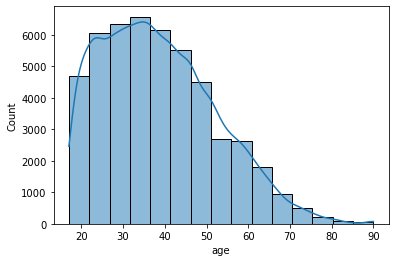

In [15]:
sns.histplot(income_data['age'] , bins = 15,kde = True) # skewed maybe needs to be normalized later


<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

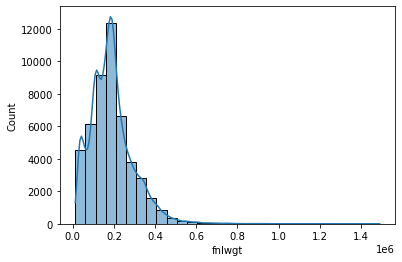

In [16]:
sns.histplot(income_data, x= 'fnlwgt'  , bins = 30 , kde = True)


<AxesSubplot:>

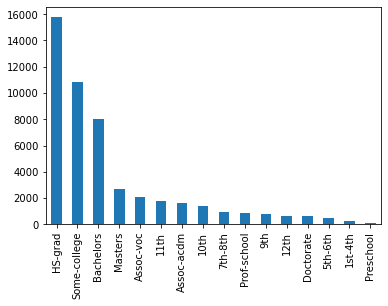

In [17]:
income_data['education'].value_counts().plot(kind='bar')

In [18]:
income_data['marital-status'].value_counts() 

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [19]:
# Married Af spouse and married civ spouse same 
#df['marital-status'].replace('Married-AF-spouse' , 'Married-civ-spouse' , inplace = True)
#df['marital-status'].value_counts()

In [20]:
# occupation ,
income_data['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
unknown              2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

<AxesSubplot:>

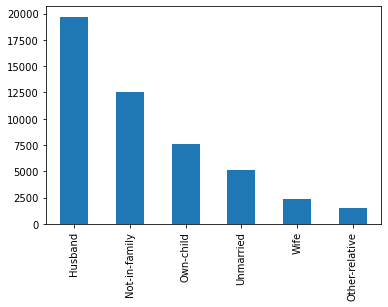

In [21]:
# relationship , 
income_data['relationship'].value_counts().plot(kind='bar')


<AxesSubplot:>

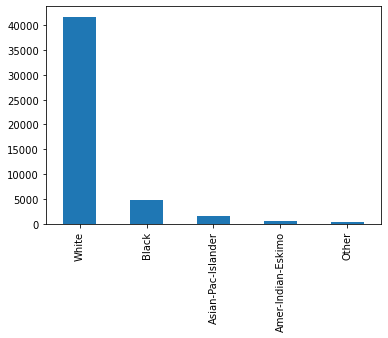

In [22]:
income_data['race'].value_counts().plot(kind='bar')


<AxesSubplot:>

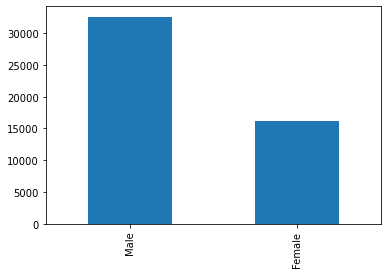

In [23]:
income_data['gender'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='income', ylabel='count'>

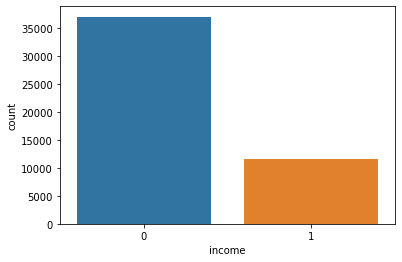

In [24]:
sns.countplot(income_data["income"]) 

(<Figure size 432x288 with 3 Axes>,
 {('Male', '0'): (0.0, 0.0, 0.6651309959731982, 0.6937688745044981),
  ('Male', '1'): (0.0,
   0.6970911336407106,
   0.6651309959731982,
   0.3029088663592892),
  ('Female', '0'): (0.6701061203513077,
   0.0,
   0.3298938796486924,
   0.8876815166063664),
  ('Female', '1'): (0.6701061203513077,
   0.891003775742579,
   0.3298938796486924,
   0.10899622425742085)})

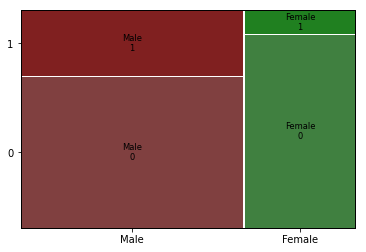

In [25]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(income_data, ['gender','income'])


(<Figure size 432x288 with 3 Axes>,
 {('Black', '0'): (0.0, 0.0, 0.09410076799729934, 0.8762165832022661),
  ('Black', '1'): (0.0,
   0.8795388423384787,
   0.09410076799729934,
   0.12046115766152117),
  ('White', '0'): (0.09900272878161308,
   0.0,
   0.838206157642397,
   0.7433867418970852),
  ('White', '1'): (0.09900272878161308,
   0.7467090010332978,
   0.838206157642397,
   0.25329099896670204),
  ('Asian-Pac-Islander', '0'): (0.9421108472083237,
   0.0,
   0.030482781347833252,
   0.7279623842301096),
  ('Asian-Pac-Islander', '1'): (0.9421108472083237,
   0.7312846433663223,
   0.030482781347833252,
   0.2687153566336776),
  ('Other', '0'): (0.9774955893404708,
   0.0,
   0.008158213070019954,
   0.8739341767180008),
  ('Other', '1'): (0.9774955893404708,
   0.8772564358542133,
   0.008158213070019954,
   0.12274356414578658),
  ('Amer-Indian-Eskimo', '0'): (0.9905557631948044,
   0.0,
   0.009444236805195561,
   0.8800452392733441),
  ('Amer-Indian-Eskimo', '1'): (0.990555763

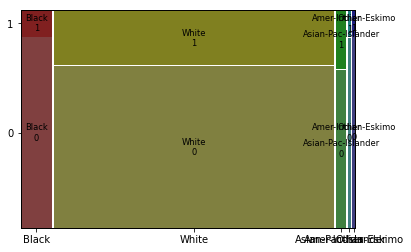

In [26]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(income_data, ['race','income'])

In [27]:
#https://www.kaggle.com/kzbrembo/knn-classification-adult-income
#use this to find the best K 

In [28]:
cfs=[feature for feature in income_data.columns if ((income_data[feature].dtypes=='O') & (feature not in ['y']))]
cfs

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [29]:
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

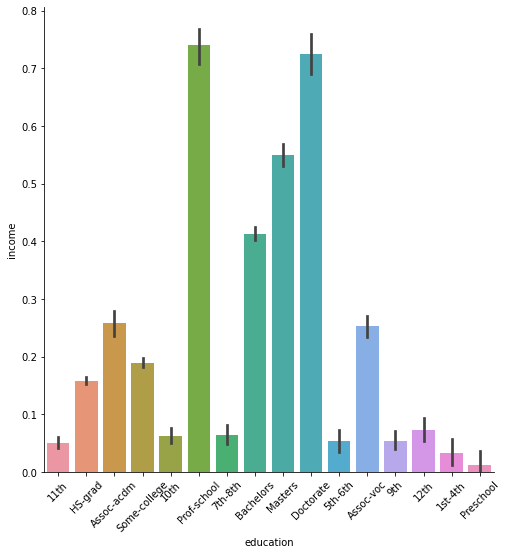

In [30]:
sns.catplot(x = 'education' , y = 'income' , data = income_data , kind = 'bar' , height = 7)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

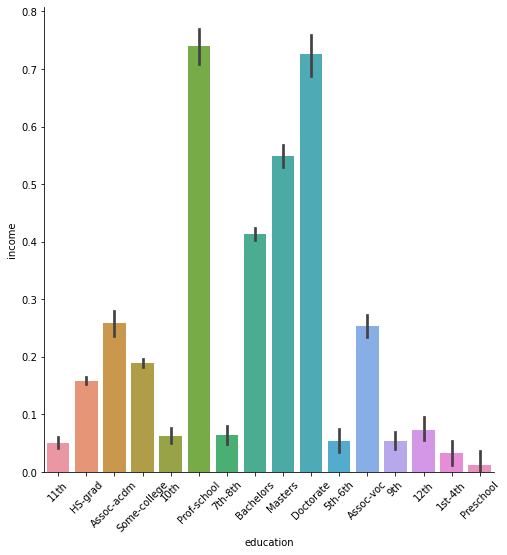

In [31]:
sns.catplot(x = 'education' , y = 'income' , data = income_data , kind = 'bar' , height = 7)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'unknown'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Prof-specialty'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Adm-clerical'),
  Text(8, 0, 'Exec-managerial'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Sales'),
  Text(11, 0, 'Priv-house-serv'),
  Text(12, 0, 'Transport-moving'),
  Text(13, 0, 'Handlers-cleaners'),
  Text(14, 0, 'Armed-Forces')])

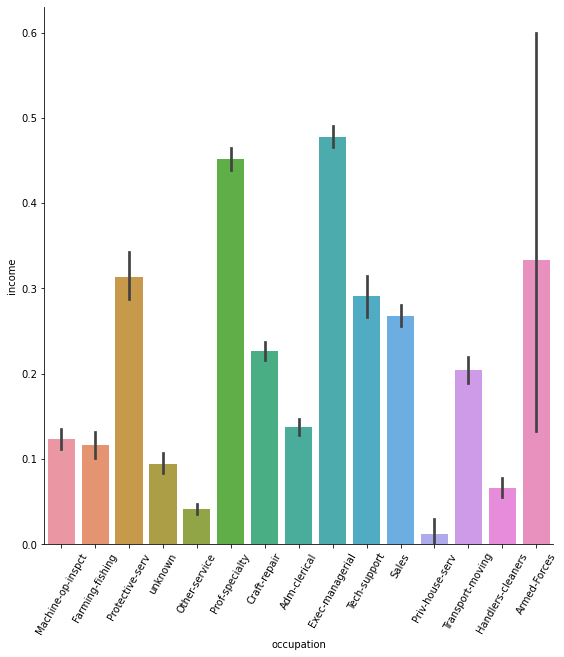

In [32]:
sns.catplot(x = 'occupation' , y = 'income' , data = income_data , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Own-child'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Not-in-family'),
  Text(3, 0, 'Unmarried'),
  Text(4, 0, 'Wife'),
  Text(5, 0, 'Other-relative')])

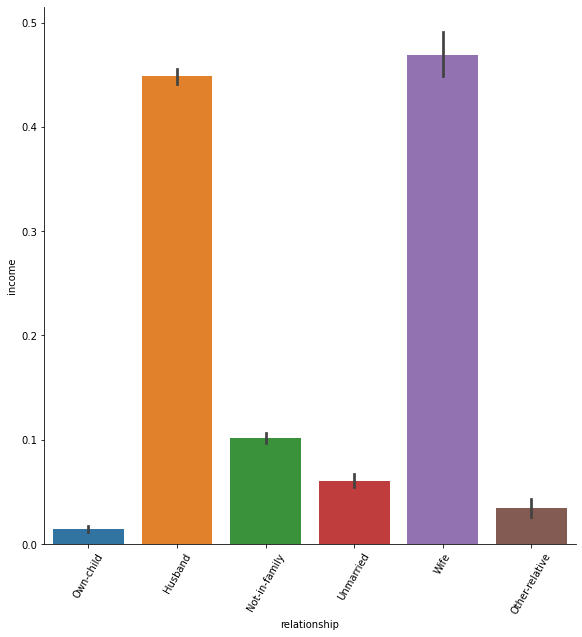

In [33]:
sns.catplot(x = 'relationship' , y = 'income' , data = income_data , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

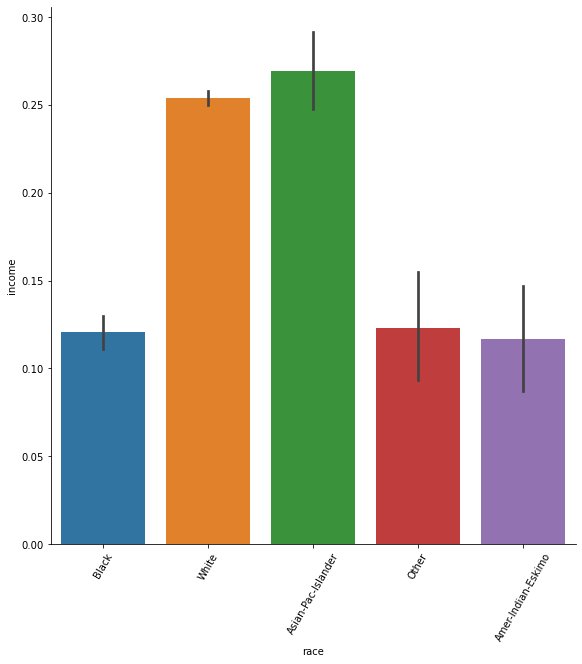

In [34]:
# Race and Income
sns.catplot(x = 'race' , y = 'income' , data = income_data , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

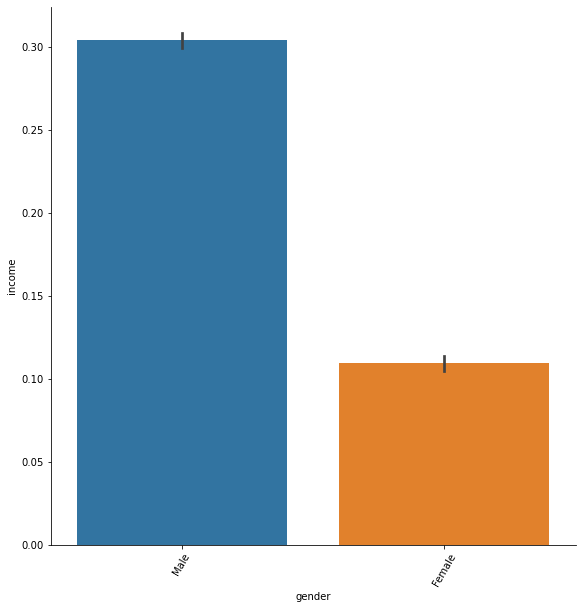

In [35]:
# Gender and Income
sns.catplot(x = 'gender' , y = 'income' , data = income_data , kind = 'bar' , height = 8)
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'Peru'),
  Text(3, 0, 'Guatemala'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Dominican-Republic'),
  Text(6, 0, 'Ireland'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'Thailand'),
  Text(10, 0, 'Haiti'),
  Text(11, 0, 'El-Salvador'),
  Text(12, 0, 'Puerto-Rico'),
  Text(13, 0, 'Vietnam'),
  Text(14, 0, 'South'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Japan'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Cambodia'),
  Text(19, 0, 'Poland'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'England'),
  Text(22, 0, 'Cuba'),
  Text(23, 0, 'Taiwan'),
  Text(24, 0, 'Italy'),
  Text(25, 0, 'Canada'),
  Text(26, 0, 'Portugal'),
  Text(27, 0, 'China'),
  Text(28, 0, 'Nicaragua'),
  Text(29, 0, 'Honduras'),
  Text(30, 0, 'Iran'),


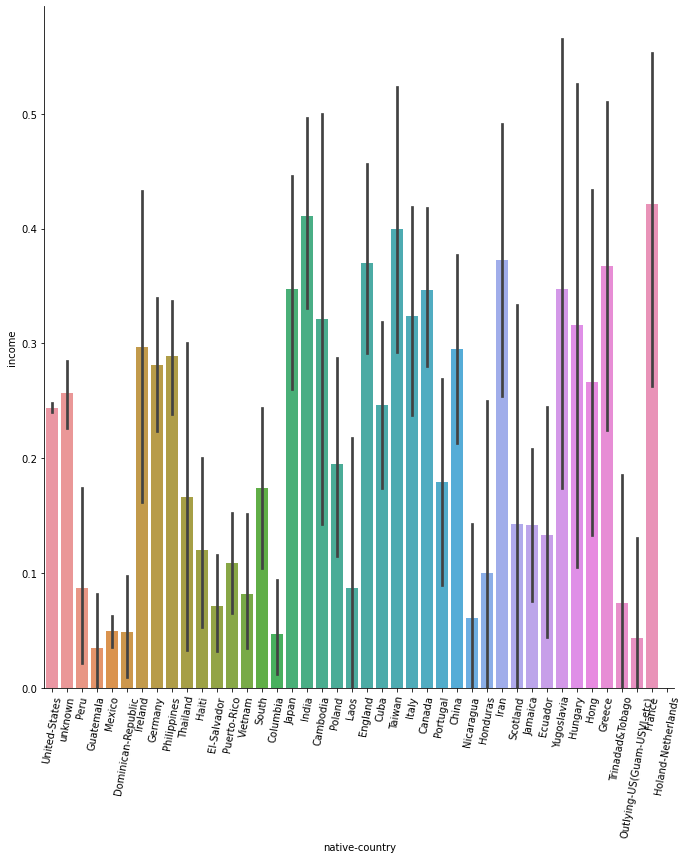

In [36]:
# native country
sns.catplot(x = 'native-country' , y = 'income' , data = income_data, kind = 'bar', height = 10)
plt.xticks(rotation = 80)

<AxesSubplot:xlabel='count', ylabel='workclass'>

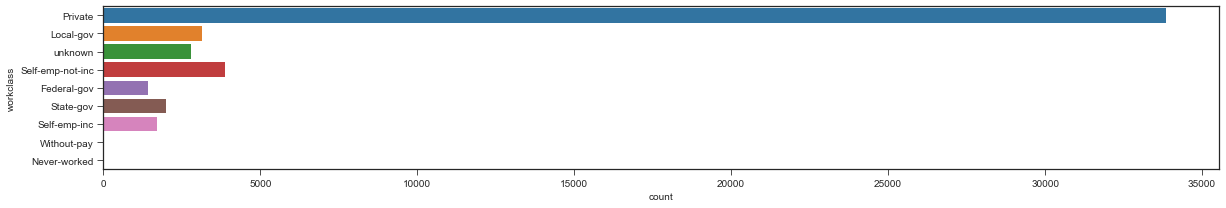

In [37]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=income_data)

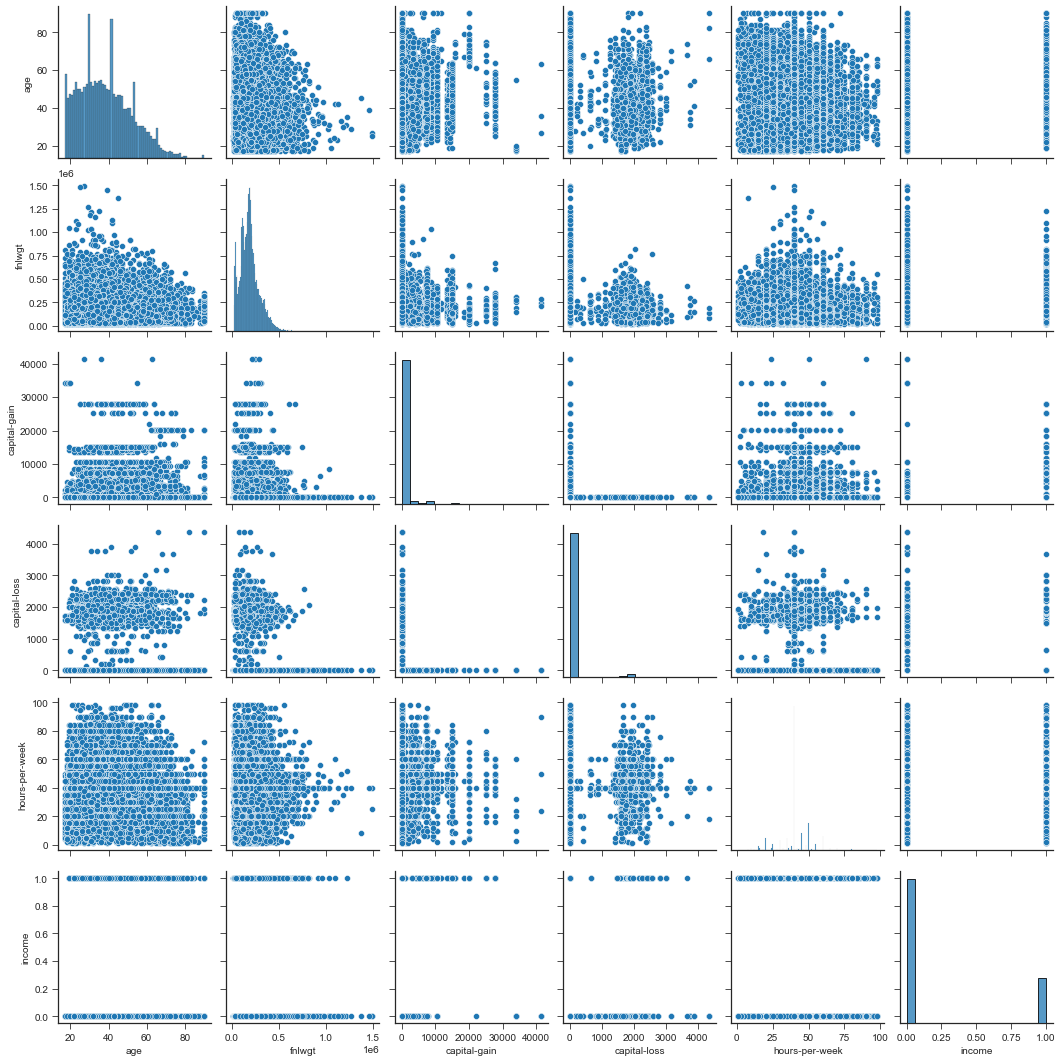

In [38]:
sns.pairplot(income_data)

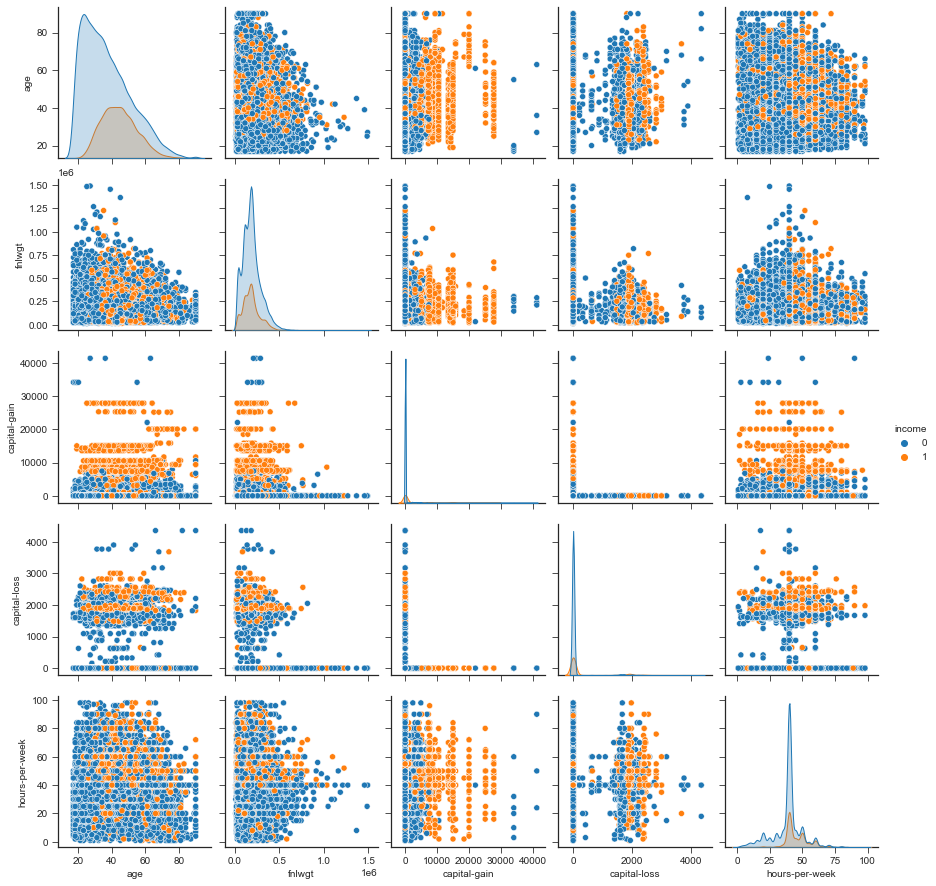

In [39]:
sns.pairplot(income_data,hue="income")


<AxesSubplot:>

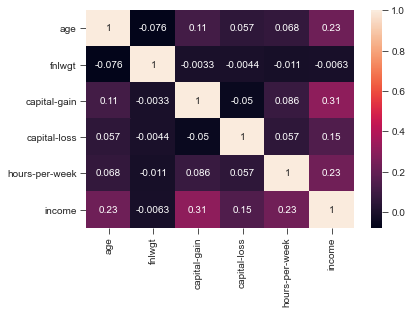

In [40]:
sns.heatmap(income_data.corr(),annot=True)

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

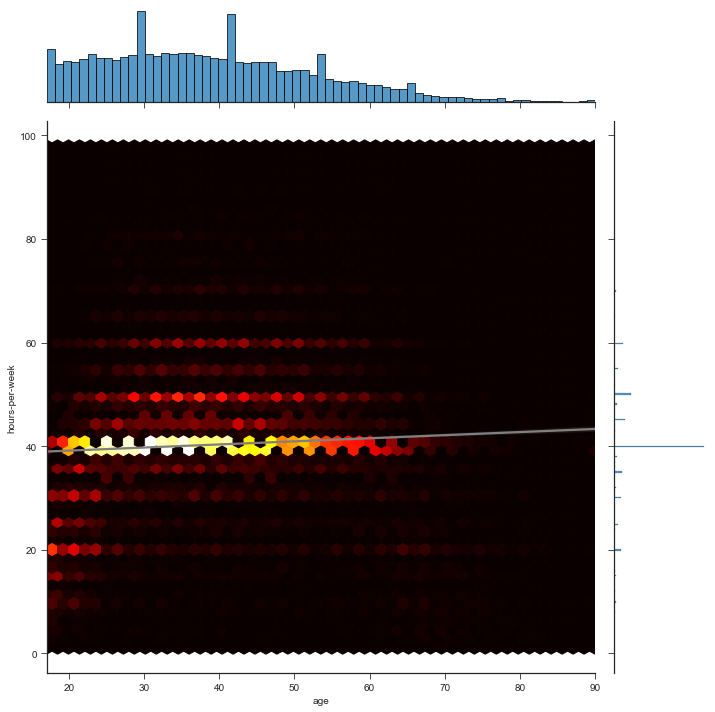

In [41]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = income_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(income_data.age, income_data['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

In [42]:
x_encoded=pd.get_dummies(income_data,columns=['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country'],drop_first=True)
x_encoded

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_unknown
0,25,226802,0.0,0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,0.0,0,50.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,0.0,0,40.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,7688.0,0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,18,103497,0.0,0,30.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,0.0,0,38.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48838,40,154374,0.0,0,40.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48839,58,151910,0.0,0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48840,22,201490,0.0,0,20.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Standardising and splitting data

In [43]:
x = x_encoded.drop('income',axis=1).copy()
y = x_encoded['income'].copy()

In [44]:
X_train, X_test,y_train,y_test = train_test_split(x,y,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)
predict = logmodel.predict(X_test_scaled)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9268
           1       0.74      0.59      0.66      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198

[[8656  612]
 [1191 1739]]


In [46]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier()
clf.fit(X_train_scaled,y_train)
pred = clf.predict(X_test_scaled)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9268
           1       0.68      0.58      0.63      2930

    accuracy                           0.83     12198
   macro avg       0.77      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198

[[8447  821]
 [1224 1706]]


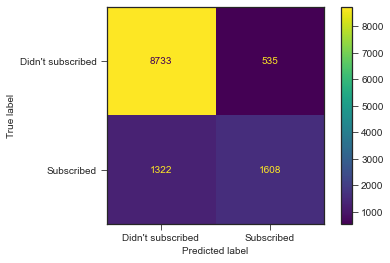

In [47]:
# building svm
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                      display_labels=["Didn't subscribed","Subscribed"])

In [48]:
#this finds the most optimal K 

In [49]:
error= []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred = knn.predict(X_test_scaled)
    error.append(1-(accuracy_score(y_test,pred)))


Text(0.5, 1.0, 'Error vs K')

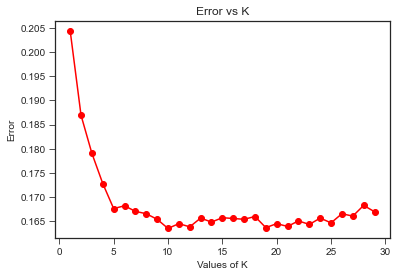

In [50]:
plt.plot(range(1,30),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.title('Error vs K')

# Classfication on dataset

In [51]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
predict_tree = tree_model.predict(X_test_scaled)
auc_DT = roc_auc_score(y_test, predict)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9268
           1       0.74      0.59      0.66      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198

[[8656  612]
 [1191 1739]]


In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
predict_knn = knn.predict(X_test_scaled)
auc_knn = roc_auc_score(y_test, predict)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9268
           1       0.74      0.59      0.66      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198

[[8656  612]
 [1191 1739]]


In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
predict_log = logmodel.predict(X_test_scaled)
auc_log = roc_auc_score(y_test, predict)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9268
           1       0.74      0.59      0.66      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198

[[8656  612]
 [1191 1739]]


In [54]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)
predict_svm = clf_svm.predict(X_test_scaled)
auc_svm = roc_auc_score(y_test, predict)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9268
           1       0.74      0.59      0.66      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198

[[8656  612]
 [1191 1739]]


In [55]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
predict_rf = rf.predict(X_test_scaled)
auc_rf = roc_auc_score(y_test, predict)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9268
           1       0.74      0.59      0.66      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198

[[8656  612]
 [1191 1739]]


In [56]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
predict_tree = tree_model.predict(X_test_scaled)
auc_DT = roc_auc_score(y_test, predict_tree)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
predict_knn = knn.predict(X_test_scaled)
auc_knn = roc_auc_score(y_test, predict_knn)
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)
predict_log = logmodel.predict(X_test_scaled)
auc_log = roc_auc_score(y_test, predict_log)
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)
predict_svm = clf_svm.predict(X_test_scaled)
auc_svm = roc_auc_score(y_test, predict_svm)
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
predict_rf = rf.predict(X_test_scaled)
auc_rf = roc_auc_score(y_test, predict_rf)


In [57]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled, y_train)
predict_xgb = xgb.predict(X_test_scaled)
auc_xgb = roc_auc_score(y_test, predict_xgb)

[16:36:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
print('Simple classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test, predict_tree)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test, predict_knn)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test, predict_log)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test, predict_svm)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test, predict_rf)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test, predict_xgb)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT)
print('AUC score of the KNN model: %.2f' % auc_knn)
print('AUC score of the LR model: %.2f' % auc_log)
print('AUC score of the SVM model: %.2f' % auc_svm)
print('AUC score of the RF model: %.2f' % auc_rf)
print('AUC score of the XGB model: %.2f' % auc_xgb)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test, predict_tree)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test, predict_knn)))
print('F1 score of the LR model: {}'.format(f1_score(y_test, predict_log)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test, predict_svm)))
print('F1 score of the RF model: {}'.format(f1_score(y_test, predict_rf)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test, predict_xgb)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test, predict_tree)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test, predict_knn)))
print('Precision score of the LR model: {}'.format(precision_score(y_test, predict_log)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test, predict_svm)))
print('Precision score of the RF model: {}'.format(precision_score(y_test, predict_rf)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test, predict_xgb)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test, predict_tree)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test, predict_knn)))
print('Recall score of the LR model: {}'.format(recall_score(y_test, predict_log)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test, predict_svm)))
print('Recall score of the RF model: {}'.format(recall_score(y_test, predict_rf)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test, predict_xgb)))

Simple classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8148876865059846
Accuracy score of the KNN model: 0.8323495655025414
Accuracy score of the LR model: 0.8521888834235121
Accuracy score of the SVM model: 0.8477619281849483
Accuracy score of the RF model: 0.8544843416953599
Accuracy score of the XGB model: 0.8626824069519593
--------------------------------------------------------
AUC score of the DT model: 0.75
AUC score of the KNN model: 0.75
AUC score of the LR model: 0.76
AUC score of the SVM model: 0.75
AUC score of the RF model: 0.77
AUC score of the XGB model: 0.78
--------------------------------------------------------
F1 score of the DT model: 0.6168985408890396
F1 score of the KNN model: 0.6252519699468572
F1 score of the LR model: 0.6585873887521303
F1 score of the SVM model: 0.6339444115907746
F1 score of the RF model: 0.6687814890837841
F1 score of the XGB model: 0.6802824966596679
------------------------

# SMOTE 

In [59]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)

In [60]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_sm, y_train_sm)
predict_tree_sm = tree_model.predict(X_test_scaled_sm)
auc_DT_sm = roc_auc_score(y_test_sm, predict_tree_sm)
print(classification_report(y_test_sm,predict_tree_sm))
print(confusion_matrix(y_test_sm,predict_tree_sm))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      9256
           1       0.80      0.89      0.84      9299

    accuracy                           0.84     18555
   macro avg       0.84      0.84      0.84     18555
weighted avg       0.84      0.84      0.84     18555

[[7237 2019]
 [1026 8273]]


In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_sm, y_train_sm)
predict_knn_sm = knn.predict(X_test_scaled_sm)
auc_knn_sm = roc_auc_score(y_test_sm, predict_knn_sm)
print(classification_report(y_test_sm,predict_knn_sm))
print(confusion_matrix(y_test_sm,predict_knn_sm))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9256
           1       0.90      0.86      0.88      9299

    accuracy                           0.88     18555
   macro avg       0.88      0.88      0.88     18555
weighted avg       0.88      0.88      0.88     18555

[[8320  936]
 [1267 8032]]


In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled_sm, y_train_sm)
predict_log_sm = logmodel.predict(X_test_scaled_sm)
auc_log_sm = roc_auc_score(y_test_sm, predict_log_sm)
print(classification_report(y_test_sm,predict_log_sm))
print(confusion_matrix(y_test_sm,predict_log_sm))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9256
           1       0.91      0.88      0.89      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8406  850]
 [1128 8171]]


In [63]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_sm, y_train_sm)
predict_svm_sm = clf_svm.predict(X_test_scaled_sm)
auc_svm_sm = roc_auc_score(y_test_sm, predict_svm_sm)
print(classification_report(y_test_sm,predict_svm_sm))
print(confusion_matrix(y_test_sm,predict_svm_sm))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9256
           1       0.92      0.87      0.89      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8529  727]
 [1254 8045]]


In [64]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_sm, y_train_sm)
predict_rf_sm = rf.predict(X_test_scaled_sm)
auc_rf_sm = roc_auc_score(y_test_sm, predict_rf_sm)
print(classification_report(y_test_sm,predict_rf_sm))
print(confusion_matrix(y_test_sm,predict_rf_sm))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9256
           1       0.89      0.90      0.89      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8196 1060]
 [ 927 8372]]


In [65]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled_sm, y_train_sm)
predict_xgb_sm = xgb.predict(X_test_scaled_sm)
auc_xgb_sm = roc_auc_score(y_test_sm, predict_xgb_sm)

[16:41:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
print('Smote classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_sm, predict_tree_sm)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_sm, predict_knn_sm)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_sm, predict_log_sm)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_sm, predict_svm_sm)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_sm, predict_rf_sm)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_sm, predict_xgb_sm)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_sm)
print('AUC score of the KNN model: %.2f' % auc_knn_sm)
print('AUC score of the LR model: %.2f' % auc_log_sm)
print('AUC score of the SVM model: %.2f' % auc_svm_sm)
print('AUC score of the RF model: %.2f' % auc_rf_sm)
print('AUC score of the XGB model: %.2f' % auc_xgb_sm)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_sm, predict_tree_sm)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_sm, predict_knn_sm)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_sm, predict_log_sm)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_sm, predict_svm_sm)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_sm, predict_rf_sm)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_sm, predict_xgb_sm)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_sm, predict_tree_sm)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_sm, predict_knn_sm)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_sm, predict_log_sm)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_sm, predict_svm_sm)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_sm, predict_rf_sm)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_sm)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_sm, predict_tree_sm)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_sm, predict_knn_sm)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_sm, predict_log_sm)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_sm, predict_svm_sm)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_sm, predict_rf_sm)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_sm, predict_xgb_sm)))



Smote classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.83589329021827
Accuracy score of the KNN model: 0.8812718943680948
Accuracy score of the LR model: 0.8933980059283212
Accuracy score of the SVM model: 0.8932363244408515
Accuracy score of the RF model: 0.8929129614659121
Accuracy score of the XGB model: 0.8379951495553759
--------------------------------------------------------
AUC score of the DT model: 0.84
AUC score of the KNN model: 0.88
AUC score of the LR model: 0.89
AUC score of the SVM model: 0.89
AUC score of the RF model: 0.89
AUC score of the XGB model: 0.84
--------------------------------------------------------
F1 score of the DT model: 0.8445714869072533
F1 score of the KNN model: 0.8794000109487053
F1 score of the LR model: 0.8920305676855894
F1 score of the SVM model: 0.8903768468817442
F1 score of the RF model: 0.893919171427046
F1 score of the XGB model: 0.8567479984750287
----------------------------

# Undersampling 

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [68]:
undersample = RandomUnderSampler()
steps = [("u",undersample)]
pipeline = Pipeline(steps=steps)
X,y1=pipeline.fit_resample(x,y)

In [69]:
X_train_us, X_test_us,y_train_us,y_test_us = train_test_split(X,y1,random_state=42)
X_train_scaled_us = scale(X_train_us)
X_test_scaled_us = scale(X_test_us)


In [70]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_us,y_train_us)
predict_tree_us = tree_model.predict(X_test_scaled_us)
auc_DT_us = roc_auc_score(y_test_us, predict_tree_us)
print(classification_report(y_test_us,predict_tree_us))
print(confusion_matrix(y_test_us,predict_tree_us))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2924
           1       0.77      0.75      0.76      2917

    accuracy                           0.76      5841
   macro avg       0.76      0.76      0.76      5841
weighted avg       0.76      0.76      0.76      5841

[[2261  663]
 [ 719 2198]]


In [71]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_us,y_train_us)
predict_knn_us = knn.predict(X_test_scaled_us)
auc_knn_us = roc_auc_score(y_test_us, predict_knn_us)
print(classification_report(y_test_us,predict_knn_us))
print(confusion_matrix(y_test_us,predict_knn_us))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2924
           1       0.77      0.81      0.79      2917

    accuracy                           0.79      5841
   macro avg       0.79      0.79      0.79      5841
weighted avg       0.79      0.79      0.79      5841

[[2233  691]
 [ 561 2356]]


In [72]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled_us,y_train_us)
predict_log_us = logmodel.predict(X_test_scaled_us)
auc_log_us = roc_auc_score(y_test_us, predict_log_us)
print(classification_report(y_test_us,predict_log_us))
print(confusion_matrix(y_test_us,predict_log_us))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      2924
           1       0.80      0.85      0.82      2917

    accuracy                           0.82      5841
   macro avg       0.82      0.82      0.82      5841
weighted avg       0.82      0.82      0.82      5841

[[2313  611]
 [ 448 2469]]


In [73]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_us, y_train_us)
predict_svm_us = clf_svm.predict(X_test_scaled_us)
auc_svm_us = roc_auc_score(y_test_us, predict_svm_us)
print(classification_report(y_test_us,predict_svm_us))
print(confusion_matrix(y_test_us,predict_svm_us))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2924
           1       0.79      0.85      0.82      2917

    accuracy                           0.81      5841
   macro avg       0.81      0.81      0.81      5841
weighted avg       0.81      0.81      0.81      5841

[[2273  651]
 [ 445 2472]]


In [74]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_us, y_train_us)
predict_rf_us = rf.predict(X_test_scaled_us)
auc_rf_us = roc_auc_score(y_test_us, predict_rf_us)
print(classification_report(y_test_us,predict_rf_us))
print(confusion_matrix(y_test_us,predict_rf_us))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2924
           1       0.81      0.82      0.82      2917

    accuracy                           0.81      5841
   macro avg       0.81      0.81      0.81      5841
weighted avg       0.81      0.81      0.81      5841

[[2351  573]
 [ 514 2403]]


In [75]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled_us, y_train_us)
predict_xgb_us = xgb.predict(X_test_scaled_us)
auc_xgb_us = roc_auc_score(y_test_us, predict_xgb_us)

[16:42:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
print('Undersampling classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_us, predict_tree_us)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_us, predict_knn_us)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_us, predict_log_us)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_us, predict_svm_us)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_us, predict_rf_us)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_us, predict_xgb_us)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_us)
print('AUC score of the KNN model: %.2f' % auc_knn_us)
print('AUC score of the LR model: %.2f' % auc_log_us)
print('AUC score of the SVM model: %.2f' % auc_svm_us)
print('AUC score of the RF model: %.2f' % auc_rf_us)
print('AUC score of the XGB model: %.2f' % auc_xgb_us)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_us, predict_tree_us)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_us, predict_knn_us)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_us, predict_log_us)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_us, predict_svm_us)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_us, predict_rf_us)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_us, predict_xgb_us)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_us, predict_tree_us)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_us, predict_knn_us)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_us, predict_log_us)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_us, predict_svm_us)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_us, predict_rf_us)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_us, predict_xgb_us)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_us, predict_tree_us)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_us, predict_knn_us)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_us, predict_log_us)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_us, predict_svm_us)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_us, predict_rf_us)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_us, predict_xgb_us)))

Undersampling classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.763396678650916
Accuracy score of the KNN model: 0.7856531415853449
Accuracy score of the LR model: 0.8186954288649204
Accuracy score of the SVM model: 0.8123608971066598
Accuracy score of the RF model: 0.8139017291559665
Accuracy score of the XGB model: 0.827598014038692
--------------------------------------------------------
AUC score of the DT model: 0.76
AUC score of the KNN model: 0.79
AUC score of the LR model: 0.82
AUC score of the SVM model: 0.81
AUC score of the RF model: 0.81
AUC score of the XGB model: 0.83
--------------------------------------------------------
F1 score of the DT model: 0.7608168916580131
F1 score of the KNN model: 0.790073775989269
F1 score of the LR model: 0.8234117058529263
F1 score of the SVM model: 0.8185430463576159
F1 score of the RF model: 0.8155438656032582
F1 score of the XGB model: 0.8302141291519137
--------------------

# Oversampling 

In [77]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [78]:
ros = RandomOverSampler()
X,y1=ros.fit_resample(x,y)
X_train_os, X_test_os,y_train_os,y_test_os = train_test_split(X,y1,random_state=42)
X_train_scaled_os = scale(X_train_os)
X_test_scaled_os = scale(X_test_os)

In [79]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled_os,y_train_os)
predict_tree_os = tree_model.predict(X_test_scaled_os)
auc_DT_os = roc_auc_score(y_test_os, predict_tree_os)
print(classification_report(y_test_os,predict_tree_os))
print(confusion_matrix(y_test_os,predict_tree_os))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      9256
           1       0.87      0.92      0.89      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[7967 1289]
 [ 779 8520]]


In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_os,y_train_os)
predict_knn_os = knn.predict(X_test_scaled_os)
auc_knn_os = roc_auc_score(y_test_os, predict_knn_os)
print(classification_report(y_test_os,predict_knn_os))
print(confusion_matrix(y_test_os,predict_knn_os))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      9256
           1       0.80      0.89      0.84      9299

    accuracy                           0.83     18555
   macro avg       0.84      0.83      0.83     18555
weighted avg       0.84      0.83      0.83     18555

[[7183 2073]
 [1028 8271]]


In [81]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled_os,y_train_os)
predict_log_os = logmodel.predict(X_test_scaled_os)
auc_log_os = roc_auc_score(y_test_os, predict_log_os)
print(classification_report(y_test_os,predict_log_os))
print(confusion_matrix(y_test_os,predict_log_os))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      9256
           1       0.81      0.85      0.83      9299

    accuracy                           0.83     18555
   macro avg       0.83      0.83      0.83     18555
weighted avg       0.83      0.83      0.83     18555

[[7432 1824]
 [1392 7907]]


In [82]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled_os, y_train_os)
predict_svm_os = clf_svm.predict(X_test_scaled_os)
auc_svm_os = roc_auc_score(y_test_os, predict_svm_os)
print(classification_report(y_test_os,predict_svm_os))
print(confusion_matrix(y_test_os,predict_svm_os))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      9256
           1       0.81      0.87      0.84      9299

    accuracy                           0.83     18555
   macro avg       0.83      0.83      0.83     18555
weighted avg       0.83      0.83      0.83     18555

[[7306 1950]
 [1181 8118]]


In [83]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_os, y_train_os)
predict_rf_os = rf.predict(X_test_scaled_os)
auc_rf_os = roc_auc_score(y_test_os, predict_rf_os)
print(classification_report(y_test_os,predict_rf_os))
print(confusion_matrix(y_test_os,predict_rf_os))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9256
           1       0.90      0.97      0.93      9299

    accuracy                           0.93     18555
   macro avg       0.93      0.93      0.93     18555
weighted avg       0.93      0.93      0.93     18555

[[8227 1029]
 [ 312 8987]]


In [84]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled_os, y_train_os)
predict_xgb_os = xgb.predict(X_test_scaled_os)
auc_xgb_os = roc_auc_score(y_test_os, predict_xgb_os)

[16:49:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
print('Oversampling classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_os, predict_tree_os)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_os, predict_knn_os)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_os, predict_log_os)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_os, predict_svm_os)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_os, predict_rf_os)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_os, predict_xgb_os)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_os)
print('AUC score of the KNN model: %.2f' % auc_knn_os)
print('AUC score of the LR model: %.2f' % auc_log_os)
print('AUC score of the SVM model: %.2f' % auc_svm_os)
print('AUC score of the RF model: %.2f' % auc_rf_os)
print('AUC score of the XGB model: %.2f' % auc_xgb_os)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_os, predict_tree_os)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_os, predict_knn_os)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_os, predict_log_os)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_os, predict_svm_os)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_os, predict_rf_os)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_os, predict_xgb_os)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_os, predict_tree_os)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_os, predict_knn_os)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_os, predict_log_os)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_os, predict_svm_os)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_os, predict_rf_os)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_os, predict_xgb_os)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_os, predict_tree_os)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_os, predict_knn_os)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_os, predict_log_os)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_os, predict_svm_os)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_os, predict_rf_os)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_os, predict_xgb_os)))


Oversampling classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8885475613042306
Accuracy score of the KNN model: 0.8328752357855026
Accuracy score of the LR model: 0.826677445432498
Accuracy score of the SVM model: 0.8312584209108057
Accuracy score of the RF model: 0.9277283751010509
Accuracy score of the XGB model: 0.8618701158717327
--------------------------------------------------------
AUC score of the DT model: 0.89
AUC score of the KNN model: 0.83
AUC score of the LR model: 0.83
AUC score of the SVM model: 0.83
AUC score of the RF model: 0.93
AUC score of the XGB model: 0.86
--------------------------------------------------------
F1 score of the DT model: 0.8917730793384969
F1 score of the KNN model: 0.8421320572214019
F1 score of the LR model: 0.8310036784025223
F1 score of the SVM model: 0.8383332472762948
F1 score of the RF model: 0.9305720942272844
F1 score of the XGB model: 0.8657060518731988
-------------------

# PCA and Smote 

In [86]:
from sklearn.decomposition import PCA


In [87]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
pca = PCA(n_components=15,whiten='True',random_state=42)
pca.fit(X_train_scaled_sm)
pca.explained_variance_ratio_
X_train_pca=pca.transform(X_train_scaled_sm)
X_test_pca=pca.transform(X_test_scaled_sm)

In [88]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_pca,y_train_sm)
predict_tree_pca = tree_model.predict(X_test_pca)
auc_DT_pca = roc_auc_score(y_test_sm, predict_tree_pca)
print(classification_report(y_test_sm,predict_tree_pca))
print(confusion_matrix(y_test_sm,predict_tree_pca))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      9256
           1       0.85      0.84      0.85      9299

    accuracy                           0.85     18555
   macro avg       0.85      0.85      0.85     18555
weighted avg       0.85      0.85      0.85     18555

[[7915 1341]
 [1459 7840]]


In [89]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train_sm)
predict_knn_pca = knn.predict(X_test_pca)
auc_knn_pca = roc_auc_score(y_test_sm, predict_knn_pca)
print(classification_report(y_test_sm,predict_knn_pca))
print(confusion_matrix(y_test_sm,predict_knn_pca))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9256
           1       0.90      0.86      0.88      9299

    accuracy                           0.88     18555
   macro avg       0.88      0.88      0.88     18555
weighted avg       0.88      0.88      0.88     18555

[[8320  936]
 [1287 8012]]


In [90]:
logmodel = LogisticRegression()
logmodel.fit(X_train_pca, y_train_sm)
predict_log_pca = logmodel.predict(X_test_pca)
auc_log_pca = roc_auc_score(y_test_sm, predict_log_pca)
print(classification_report(y_test_sm,predict_log_pca))
print(confusion_matrix(y_test_sm,predict_log_pca))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      9256
           1       0.82      0.89      0.85      9299

    accuracy                           0.84     18555
   macro avg       0.85      0.84      0.84     18555
weighted avg       0.85      0.84      0.84     18555

[[7389 1867]
 [1024 8275]]


In [91]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_pca, y_train_sm)
predict_svm_pca = clf_svm.predict(X_test_pca)
auc_svm_pca = roc_auc_score(y_test_sm, predict_svm_pca)
print(classification_report(y_test_sm,predict_svm_pca))
print(confusion_matrix(y_test_sm,predict_svm_sm))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9256
           1       0.91      0.86      0.88      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8529  727]
 [1254 8045]]


In [92]:
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train_sm)
predict_rf_pca = rf.predict(X_test_pca)
auc_rf_pca = roc_auc_score(y_test_sm, predict_rf_pca)
print(classification_report(y_test_sm,predict_rf_pca))
print(confusion_matrix(y_test_sm,predict_rf_pca))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9256
           1       0.91      0.86      0.88      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8426  830]
 [1291 8008]]


In [93]:
xgb=XGBClassifier()
xgb.fit(X_train_pca, y_train_sm)
predict_xgb_pca = xgb.predict(X_test_pca)
auc_xgb_pca = roc_auc_score(y_test_sm, predict_xgb_pca)

[16:52:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [94]:
print('PCA and Smote classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_sm, predict_tree_pca)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_sm, predict_knn_pca)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_sm, predict_log_pca)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_sm, predict_svm_pca)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_sm, predict_rf_pca)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_sm, predict_xgb_pca)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_pca)
print('AUC score of the KNN model: %.2f' % auc_knn_pca)
print('AUC score of the LR model: %.2f' % auc_log_pca)
print('AUC score of the SVM model: %.2f' % auc_svm_pca)
print('AUC score of the RF model: %.2f' % auc_rf_pca)
print('AUC score of the XGB model: %.2f' % auc_xgb_pca)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_sm, predict_tree_pca)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_sm, predict_knn_pca)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_sm, predict_log_pca)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_sm, predict_svm_pca)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_sm, predict_rf_pca)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_sm, predict_xgb_pca)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_sm, predict_tree_pca)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_sm, predict_knn_pca)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_sm, predict_log_pca)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_sm, predict_svm_pca)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_sm, predict_rf_pca)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_pca)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_sm, predict_tree_pca)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_sm, predict_knn_pca)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_sm, predict_log_pca)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_sm, predict_svm_pca)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_sm, predict_rf_pca)))
print('Recall score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_pca)))

PCA and Smote classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8490972783616276
Accuracy score of the KNN model: 0.8801940177849636
Accuracy score of the LR model: 0.8441929399083805
Accuracy score of the SVM model: 0.8857450821880894
Accuracy score of the RF model: 0.8856911883589329
Accuracy score of the XGB model: 0.884936674750741
--------------------------------------------------------
AUC score of the DT model: 0.85
AUC score of the KNN model: 0.88
AUC score of the LR model: 0.84
AUC score of the SVM model: 0.89
AUC score of the RF model: 0.89
AUC score of the XGB model: 0.88
--------------------------------------------------------
F1 score of the DT model: 0.8484848484848485
F1 score of the KNN model: 0.8781717542609744
F1 score of the LR model: 0.8512936577336556
F1 score of the SVM model: 0.8831312017640573
F1 score of the RF model: 0.8830567348514087
F1 score of the XGB model: 0.8836195148541837
------------------

# LDA and Smote

In [95]:
lda = LDA(n_components=1)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x,y)
X_train_sm, X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,random_state=42)
X_train_scaled_sm = scale(X_train_sm)
X_test_scaled_sm = scale(X_test_sm)
X_train_lda=lda.fit_transform(X_train_scaled_sm,y_train_sm)
X_train_lda.shape
X_test_lda=lda.transform(X_test_scaled_sm)

In [96]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_lda,y_train_sm)
predict_tree_lda = tree_model.predict(X_test_lda)
auc_DT_lda = roc_auc_score(y_test_sm, predict_tree_lda)
print(classification_report(y_test_sm,predict_tree_lda))
print(confusion_matrix(y_test_sm,predict_tree_lda))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      9256
           1       0.85      0.84      0.84      9299

    accuracy                           0.84     18555
   macro avg       0.84      0.84      0.84     18555
weighted avg       0.84      0.84      0.84     18555

[[7841 1415]
 [1507 7792]]


In [97]:
knn = KNeighborsClassifier()
knn.fit(X_train_lda, y_train_sm)
predict_knn_lda = knn.predict(X_test_lda)
auc_knn_lda = roc_auc_score(y_test_sm, predict_knn_lda)
print(classification_report(y_test_sm,predict_knn_lda))
print(confusion_matrix(y_test_sm,predict_knn_lda))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      9256
           1       0.89      0.86      0.87      9299

    accuracy                           0.87     18555
   macro avg       0.87      0.87      0.87     18555
weighted avg       0.87      0.87      0.87     18555

[[8230 1026]
 [1334 7965]]


In [98]:
logmodel = LogisticRegression()
logmodel.fit(X_train_lda, y_train_sm)
predict_log_lda = logmodel.predict(X_test_lda)
auc_log_lda = roc_auc_score(y_test_sm, predict_log_lda)
print(classification_report(y_test_sm,predict_log_lda))
print(confusion_matrix(y_test_sm,predict_log_lda))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      9256
           1       0.90      0.87      0.89      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8353  903]
 [1194 8105]]


In [99]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_lda, y_train_sm)
predict_svm_lda = clf_svm.predict(X_test_lda)
auc_svm_lda = roc_auc_score(y_test_sm, predict_svm_lda)
print(classification_report(y_test_sm,predict_svm_lda))
print(confusion_matrix(y_test_sm,predict_svm_lda))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9256
           1       0.91      0.86      0.88      9299

    accuracy                           0.89     18555
   macro avg       0.89      0.89      0.89     18555
weighted avg       0.89      0.89      0.89     18555

[[8449  807]
 [1293 8006]]


In [100]:
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train_sm)
predict_rf_lda = rf.predict(X_test_lda)
auc_rf_lda = roc_auc_score(y_test_sm, predict_rf_lda)
print(classification_report(y_test_sm,predict_rf_lda))
print(confusion_matrix(y_test_sm,predict_rf_lda))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      9256
           1       0.85      0.84      0.84      9299

    accuracy                           0.84     18555
   macro avg       0.84      0.84      0.84     18555
weighted avg       0.84      0.84      0.84     18555

[[7843 1413]
 [1504 7795]]


In [101]:
xgb=XGBClassifier()
xgb.fit(X_train_lda, y_train_sm)
predict_xgb_lda = xgb.predict(X_test_lda)
auc_xgb_lda = roc_auc_score(y_test_sm, predict_xgb_lda)

[16:55:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [102]:
print('LDA and Smote classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_sm, predict_tree_lda)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_sm, predict_knn_lda)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_sm, predict_log_lda)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_sm, predict_svm_lda)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_sm, predict_rf_lda)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_sm, predict_xgb_lda)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_lda)
print('AUC score of the KNN model: %.2f' % auc_knn_lda)
print('AUC score of the LR model: %.2f' % auc_log_lda)
print('AUC score of the SVM model: %.2f' % auc_svm_lda)
print('AUC score of the RF model: %.2f' % auc_rf_lda)
print('AUC score of the XGB model: %.2f' % auc_xgb_lda)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_sm, predict_tree_lda)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_sm, predict_knn_lda)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_sm, predict_log_lda)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_sm, predict_svm_lda)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_sm, predict_rf_lda)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_sm, predict_xgb_lda)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_sm, predict_tree_lda)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_sm, predict_knn_lda)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_sm, predict_log_lda)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_sm, predict_svm_lda)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_sm, predict_rf_lda)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_lda)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_sm, predict_tree_lda)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_sm, predict_knn_lda)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_sm, predict_log_lda)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_sm, predict_svm_lda)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_sm, predict_rf_lda)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_sm, predict_xgb_lda)))

LDA and Smote classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8425222312045271
Accuracy score of the KNN model: 0.8728105631905146
Accuracy score of the LR model: 0.8869846402586904
Accuracy score of the SVM model: 0.8868229587712207
Accuracy score of the RF model: 0.8427917003503099
Accuracy score of the XGB model: 0.887523578550256
--------------------------------------------------------
AUC score of the DT model: 0.84
AUC score of the KNN model: 0.87
AUC score of the LR model: 0.89
AUC score of the SVM model: 0.89
AUC score of the RF model: 0.84
AUC score of the XGB model: 0.89
--------------------------------------------------------
F1 score of the DT model: 0.8421052631578947
F1 score of the KNN model: 0.8709677419354839
F1 score of the LR model: 0.8854536516086742
F1 score of the SVM model: 0.8840547703180213
F1 score of the RF model: 0.8423839628248769
F1 score of the XGB model: 0.8852224605400648
------------------

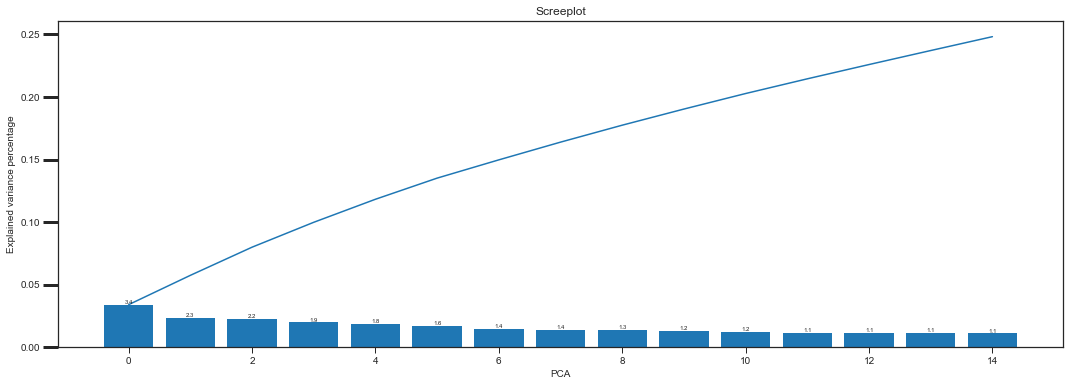

In [103]:
num_components = len(pca.explained_variance_ratio_)
index=np.arange(num_components)

values = pca.explained_variance_ratio_

#define the graph
plt.figure(figsize=(18,6))
ax=plt.subplot(111)
cumulative = np.cumsum(values)
ax.bar(index,values)
ax.plot(index,cumulative)
for val in range(num_components):
    ax.annotate(r"%s"%((str(values[val]*100)[:3])),(index[val],values[val]),
    va = 'bottom', ha='center',fontsize=6)
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3,length=15)
    ax.set_xlabel("PCA")
    ax.set_ylabel("Explained variance percentage")
    plt.title('Screeplot')

# Random search for scaled 

In [104]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled, y_train)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)
# default options - uniform (all points in the neighborhood are weighted equally)
# another option - distance (weights closer neighbors more heavily than further neighbors)
# n_neighbors is K
param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled, y_train)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options (Albon, 2017)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled, y_train)
print("LR - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR - Best Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled, y_train)
print("RF - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF - Best Parameters : ",random_search_cv.best_estimator_)



param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled, y_train)
print("SVM - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_)

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_scaled, y_train)
print("XGB - Best Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB - Best Parameters : ",random_search_cv.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.3s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.2s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.2s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.2s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.2s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.2s
DT - Best Score :   0.8541210175849677
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   7.4s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   5.4s
[CV] END .....................n_neighbors=1, 

In [105]:
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 49,max_depth=25)
tree_model.fit(X_train_scaled, y_train)
predict_tree_cv = tree_model.predict(X_test_scaled)
auc_DT_cv = roc_auc_score(y_test, predict_tree_cv)


knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train_scaled, y_train)
predict_knn_cv = knn.predict(X_test_scaled)
auc_knn_cv = roc_auc_score(y_test, predict_knn_cv)


logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_scaled, y_train)
predict_log_cv = logmodel.predict(X_test_scaled)
auc_log_cv = roc_auc_score(y_test, predict_log_cv)


clf_svm = SVC(C=8.31993941811405,gamma=0.015751320499779724)
clf_svm.fit(X_train_scaled,y_train)
predict_svm_cv = clf_svm.predict(X_test_scaled)
auc_svm_cv = roc_auc_score(y_test, predict_svm_cv)


rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_scaled,y_train)
predict_rf_cv = rf.predict(X_test_scaled)
auc_rf_cv = roc_auc_score(y_test, predict_rf_cv)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_scaled, y_train)
predict_xgb_cv = xgb.predict(X_test_scaled)
auc_xgb_cv = roc_auc_score(y_test, predict_xgb_cv)



[17:27:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
print('Simple classification model CV')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test, predict_tree_cv)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test, predict_knn_cv)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test, predict_log_cv)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test, predict_svm_cv)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test, predict_rf_cv)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test, predict_xgb_cv)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_cv)
print('AUC score of the KNN model: %.2f' % auc_knn_cv)
print('AUC score of the LR model: %.2f' % auc_log_cv)
print('AUC score of the SVM model: %.2f' % auc_svm_cv)
print('AUC score of the RF model: %.2f' % auc_rf_cv)
print('AUC score of the XGB model: %.2f' % auc_xgb_cv)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test, predict_tree_cv)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test, predict_knn_cv)))
print('F1 score of the LR model: {}'.format(f1_score(y_test, predict_log_cv)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test, predict_svm_cv)))
print('F1 score of the RF model: {}'.format(f1_score(y_test, predict_rf_cv)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test, predict_xgb_cv)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test, predict_tree_cv)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test, predict_knn_cv)))
print('Precision score of the LR model: {}'.format(precision_score(y_test, predict_log_cv)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test, predict_svm_cv)))
print('Precision score of the RF model: {}'.format(precision_score(y_test, predict_rf_cv)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test, predict_xgb_cv)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test, predict_tree_cv)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test, predict_knn_cv)))
print('Recall score of the LR model: {}'.format(recall_score(y_test, predict_log_cv)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test, predict_svm_cv)))
print('Recall score of the RF model: {}'.format(recall_score(y_test, predict_rf_cv)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test, predict_xgb_cv)))

Simple classification model CV
--------------------------------------------------------
Accuracy score of the DT model: 0.85407443843253
Accuracy score of the KNN model: 0.8190686997868503
Accuracy score of the LR model: 0.852106902770946
Accuracy score of the SVM model: 0.8445646827348746
Accuracy score of the RF model: 0.8538284964748319
Accuracy score of the XGB model: 0.8548942449581899
--------------------------------------------------------
AUC score of the DT model: 0.75
AUC score of the KNN model: 0.74
AUC score of the LR model: 0.76
AUC score of the SVM model: 0.75
AUC score of the RF model: 0.74
AUC score of the XGB model: 0.77
--------------------------------------------------------
F1 score of the DT model: 0.6449940167530913
F1 score of the KNN model: 0.6045511557068626
F1 score of the LR model: 0.6584627035213934
F1 score of the SVM model: 0.6399544246107102
F1 score of the RF model: 0.6358995303246886
F1 score of the XGB model: 0.6682908545727138
------------------------

# Random search for smote 

In [107]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)

param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   

penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("LR - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR - Best Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("RF - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF - Best Parameters : ",random_search_cv.best_estimator_)

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("SVM - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_)

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_scaled_sm, y_train_sm)
print("XGB - Best Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB - Best Parameters : ",random_search_cv.best_estimator_)
 

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.5s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.4s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.4s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.4s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.4s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.4s
DT - Best Score :   0.8702190302652552
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.2s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.3s
[CV] END .....................n_neighbors=1, 

In [108]:
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 49,max_depth=25)
tree_model.fit(X_train_scaled_sm, y_train_sm)
predict_tree_sm_cv = tree_model.predict(X_test_scaled_sm)
auc_DT_sm_cv = roc_auc_score(y_test_sm, predict_tree_sm_cv)


knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train_scaled_sm, y_train_sm)
predict_knn_sm_cv = knn.predict(X_test_scaled_sm)
auc_knn_sm_cv = roc_auc_score(y_test_sm, predict_knn_sm_cv)


logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_scaled_sm, y_train_sm)
predict_log_sm_cv = logmodel.predict(X_test_scaled_sm)
auc_log_sm_cv = roc_auc_score(y_test_sm, predict_log_sm_cv)


clf_svm = SVC(C=8.31993941811405,gamma=0.015751320499779724)
clf_svm.fit(X_train_scaled_sm,y_train_sm)
predict_svm_sm_cv = clf_svm.predict(X_test_scaled_sm)
auc_svm_sm_cv = roc_auc_score(y_test_sm, predict_svm_sm_cv)


rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_scaled_sm,y_train_sm)
predict_rf_sm_cv = rf.predict(X_test_scaled_sm)
auc_rf_sm_cv = roc_auc_score(y_test_sm, predict_rf_sm_cv)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=25, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_scaled_sm, y_train_sm)
predict_xgb_sm_cv = xgb.predict(X_test_scaled_sm)
auc_xgb_sm_cv = roc_auc_score(y_test_sm, predict_xgb_sm_cv)



[18:21:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [109]:
print('Smote CV classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_sm, predict_tree_sm_cv)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_sm, predict_knn_sm_cv)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_sm, predict_log_sm_cv)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_sm, predict_svm_sm_cv)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_sm, predict_rf_sm_cv)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_sm, predict_xgb_sm_cv)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_sm_cv)
print('AUC score of the KNN model: %.2f' % auc_knn_sm_cv)
print('AUC score of the LR model: %.2f' % auc_log_sm_cv)
print('AUC score of the SVM model: %.2f' % auc_svm_sm_cv)
print('AUC score of the RF model: %.2f' % auc_rf_sm_cv)
print('AUC score of the XGB model: %.2f' % auc_xgb_sm_cv)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_sm, predict_tree_sm_cv)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_sm, predict_knn_sm_cv)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_sm, predict_log_sm_cv)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_sm, predict_svm_sm_cv)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_sm, predict_rf_sm_cv)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_sm, predict_xgb_sm_cv)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_sm, predict_tree_sm_cv)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_sm, predict_knn_sm_cv)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_sm, predict_log_sm_cv)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_sm, predict_svm_sm_cv)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_sm, predict_rf_sm_cv)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_sm_cv)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_sm, predict_tree_sm_cv)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_sm, predict_knn_sm_cv)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_sm, predict_log_sm_cv)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_sm, predict_svm_sm_cv)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_sm, predict_rf_sm_cv)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_sm, predict_xgb_sm_cv)))



Smote CV classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8504985179196982
Accuracy score of the KNN model: 0.8744273780652115
Accuracy score of the LR model: 0.8933980059283212
Accuracy score of the SVM model: 0.8938291565615737
Accuracy score of the RF model: 0.8785772029102668
Accuracy score of the XGB model: 0.8387496631635678
--------------------------------------------------------
AUC score of the DT model: 0.85
AUC score of the KNN model: 0.87
AUC score of the LR model: 0.89
AUC score of the SVM model: 0.89
AUC score of the RF model: 0.88
AUC score of the XGB model: 0.84
--------------------------------------------------------
F1 score of the DT model: 0.8592592592592593
F1 score of the KNN model: 0.8726219112180188
F1 score of the LR model: 0.8920305676855894
F1 score of the SVM model: 0.8912083057212281
F1 score of the RF model: 0.8808251785242001
F1 score of the XGB model: 0.8572791452012973
----------------------

# Random search oversampling 

In [110]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_os, y_train_os)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)
# default options - uniform (all points in the neighborhood are weighted equally)
# another option - distance (weights closer neighbors more heavily than further neighbors)
# n_neighbors is K
param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_os, y_train_os)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options (Albon, 2017)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_os, y_train_os)
print("LR - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR - Best Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_os, y_train_os)
print("RF - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF - Best Parameters : ",random_search_cv.best_estimator_)

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_os, y_train_os)
print("SVM - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_) 

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_scaled_os, y_train_os)
print("XGB - Best Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB - Best Parameters : ",random_search_cv.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.5s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.4s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.5s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.5s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.5s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.5s
DT - Best Score :   0.820527118868058
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=  18.3s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.5s
[CV] END .....................n_neighbors=1, w

In [111]:
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 49,max_depth=25)
tree_model.fit(X_train_os, y_train_os)
predict_tree_os_cv = tree_model.predict(X_test_os)
auc_DT_os_cv = roc_auc_score(y_test_os, predict_tree_os_cv)


knn = KNeighborsClassifier(weights = 'uniform', n_neighbors= 1)
knn.fit(X_train_os, y_train_os)
predict_knn_os_cv = knn.predict(X_test_os)
auc_knn_os_cv = roc_auc_score(y_test_os, predict_knn_os_cv)

logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_os, y_train_os)
predict_log_os_cv = logmodel.predict(X_test_scaled_sm)
auc_log_os_cv = roc_auc_score(y_test_os, predict_log_os_cv)


clf_svm = SVC(C=4.745401188473625,gamma=0.07969454818643928)
clf_svm.fit(X_train_os, y_train_os)
predict_svm_os_cv = clf_svm.predict(X_test_os)
auc_svm_os_cv = roc_auc_score(y_test_os, predict_svm_os_cv)


rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_os, y_train_os)
predict_rf_os_cv = rf.predict(X_test_os)
auc_rf_os_cv = roc_auc_score(y_test_os, predict_rf_os_cv)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=25, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_os, y_train_os)
predict_xgb_os_cv = xgb.predict(X_test_os)
auc_xgb_os_cv = roc_auc_score(y_test_os, predict_xgb_os_cv)




[19:58:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [112]:
print('Oversampling classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_os, predict_tree_os_cv)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_os, predict_knn_os_cv)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_os, predict_log_os_cv)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_os, predict_svm_os_cv)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_os, predict_rf_os_cv)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_os, predict_xgb_os_cv)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_os_cv)
print('AUC score of the KNN model: %.2f' % auc_knn_os_cv)
print('AUC score of the LR model: %.2f' % auc_log_os_cv)
print('AUC score of the SVM model: %.2f' % auc_svm_os_cv)
print('AUC score of the RF model: %.2f' % auc_rf_os_cv)
print('AUC score of the XGB model: %.2f' % auc_xgb_os_cv)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_os, predict_tree_os_cv)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_os, predict_knn_os_cv)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_os, predict_log_os_cv)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_os, predict_svm_os_cv)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_os, predict_rf_os_cv)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_os, predict_xgb_os_cv)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_os, predict_tree_os_cv)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_os, predict_knn_os_cv)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_os, predict_log_os_cv)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_os, predict_svm_os_cv)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_os, predict_rf_os_cv)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_os, predict_xgb_os_cv)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_os, predict_tree_os_cv)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_os, predict_knn_os_cv)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_os, predict_log_os_cv)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_os, predict_svm_os_cv)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_os, predict_rf_os_cv)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_os, predict_xgb_os_cv)))



Oversampling classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8277014281864726
Accuracy score of the KNN model: 0.8714632174616006
Accuracy score of the LR model: 0.6119105362436001
Accuracy score of the SVM model: 0.938668822419833
Accuracy score of the RF model: 0.8202101859337106
Accuracy score of the XGB model: 0.9338183777957424
--------------------------------------------------------
AUC score of the DT model: 0.83
AUC score of the KNN model: 0.87
AUC score of the LR model: 0.61
AUC score of the SVM model: 0.94
AUC score of the RF model: 0.82
AUC score of the XGB model: 0.93
--------------------------------------------------------
F1 score of the DT model: 0.8346179711344474
F1 score of the KNN model: 0.8814199771292199
F1 score of the LR model: 0.41894617929476324
F1 score of the SVM model: 0.9372311086596802
F1 score of the RF model: 0.8288879770209274
F1 score of the XGB model: 0.9363730569948187
------------------

# Random search undersampling 

In [113]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_us, y_train_us)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)
# default options - uniform (all points in the neighborhood are weighted equally)
param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_us, y_train_us)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options (Albon, 2017)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_us, y_train_us)
print("LR - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR - Best Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_us, y_train_us)
print("RF - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF - Best Parameters : ",random_search_cv.best_estimator_)



param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_scaled_us, y_train_us)
print("SVM - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_)  

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_scaled_us, y_train_us)
print("XGB - Best Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB - Best Parameters : ",random_search_cv.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.1s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.1s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.1s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.1s
DT - Best Score :   0.8101706739244469
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   2.4s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.4s
[CV] END .....................n_neighbors=1, 

In [114]:
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 49,max_depth=25)
tree_model.fit(X_train_scaled_us, y_train_us)
predict_tree_us_cv = tree_model.predict(X_test_scaled_us)
auc_DT_us_cv = roc_auc_score(y_test_us, predict_tree_us_cv)


knn = KNeighborsClassifier(weights = 'distance', n_neighbors= 3)
knn.fit(X_train_scaled_us, y_train_us)
predict_knn_us_cv = knn.predict(X_test_scaled_us)
auc_knn_us_cv = roc_auc_score(y_test_us, predict_knn_us_cv)

logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_scaled_us, y_train_us)
predict_log_us_cv = logmodel.predict(X_test_scaled_us)
auc_log_us_cv = roc_auc_score(y_test_us, predict_log_us_cv)


clf_svm = SVC(C=8.31993941811405,gamma=0.015751320499779724)
clf_svm.fit(X_train_scaled_us, y_train_us)
predict_svm_us_cv = clf_svm.predict(X_test_scaled_us)
auc_svm_us_cv = roc_auc_score(y_test_us, predict_svm_us_cv)


rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_scaled_us, y_train_us)
predict_rf_us_cv = rf.predict(X_test_scaled_us)
auc_rf_us_cv = roc_auc_score(y_test_us, predict_rf_us_cv)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=35, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_scaled_us, y_train_us)
predict_xgb_us_cv = xgb.predict(X_test_scaled_us)
auc_xgb_us_cv = roc_auc_score(y_test_us, predict_xgb_us_cv)



[20:07:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
print('Undersampling classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_us, predict_tree_us_cv)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_us, predict_knn_us_cv)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_us, predict_log_us_cv)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_us, predict_svm_us_cv)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_us, predict_rf_us_cv)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_us, predict_xgb_us_cv)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_us_cv)
print('AUC score of the KNN model: %.2f' % auc_knn_us_cv)
print('AUC score of the LR model: %.2f' % auc_log_us_cv)
print('AUC score of the SVM model: %.2f' % auc_svm_us_cv)
print('AUC score of the RF model: %.2f' % auc_rf_us_cv)
print('AUC score of the XGB model: %.2f' % auc_xgb_us_cv)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_us, predict_tree_us_cv)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_us, predict_knn_us_cv)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_us, predict_log_us_cv)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_us, predict_svm_us_cv)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_us, predict_rf_us_cv)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_us, predict_xgb_us_cv)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_us, predict_tree_us_cv)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_us, predict_knn_us_cv)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_us, predict_log_us_cv)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_us, predict_svm_us_cv)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_us, predict_rf_us_cv)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_us, predict_xgb_us_cv)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_us, predict_tree_us_cv)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_us, predict_knn_us_cv)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_us, predict_log_us_cv)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_us, predict_svm_us_cv)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_us, predict_rf_us_cv)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_us, predict_xgb_us_cv)))

Undersampling classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8183530217428523
Accuracy score of the KNN model: 0.7745249101181304
Accuracy score of the LR model: 0.8186954288649204
Accuracy score of the SVM model: 0.8089368258859785
Accuracy score of the RF model: 0.8231467214518062
Accuracy score of the XGB model: 0.8077384009587399
--------------------------------------------------------
AUC score of the DT model: 0.82
AUC score of the KNN model: 0.77
AUC score of the LR model: 0.82
AUC score of the SVM model: 0.81
AUC score of the RF model: 0.82
AUC score of the XGB model: 0.81
--------------------------------------------------------
F1 score of the DT model: 0.8233139050791007
F1 score of the KNN model: 0.7767418206475675
F1 score of the LR model: 0.8234117058529263
F1 score of the SVM model: 0.8162660520250247
F1 score of the RF model: 0.8303498111348333
F1 score of the XGB model: 0.8087208312042242
-----------------

# Random search pca 

In [116]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_pca, y_train_sm)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)
# default options - uniform (all points in the neighborhood are weighted equally)
# another option - distance (weights closer neighbors more heavily than further neighbors)
# n_neighbors is K
param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_pca, y_train_sm)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options (Albon, 2017)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_pca, y_train_sm)
print("LR - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR - Best Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_pca, y_train_sm)
print("RF - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF - Best Parameters : ",random_search_cv.best_estimator_)



param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_pca, y_train_sm)
print("SVM - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_)

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_pca, y_train_sm)
print("XGB - Best Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB - Best Parameters : ",random_search_cv.best_estimator_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.6s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.5s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.5s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.5s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.5s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.5s
DT - Best Score :   0.8666259233888306
{'min_samples_split': 2, 'max_leaf_nodes': 49, 'max_depth': 25}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=25, max_leaf_nodes=49)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.6s
[CV] END .....................n_neighbors=1, 

In [117]:
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 49,max_depth=25)
tree_model.fit(X_train_pca,y_train_sm)
predict_tree_pca_cv = tree_model.predict(X_test_pca)
auc_DT_pca_cv = roc_auc_score(y_test_sm, predict_tree_pca_cv)


knn = KNeighborsClassifier(weights = 'distance', n_neighbors= 3)
knn.fit(X_train_pca,y_train_sm)
predict_knn_pca_cv = knn.predict(X_test_pca)
auc_knn_pca_cv = roc_auc_score(y_test_sm, predict_knn_pca_cv)

logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_pca,y_train_sm)
predict_log_pca_cv = logmodel.predict(X_test_pca)
auc_log_pca_cv = roc_auc_score(y_test_sm, predict_log_pca_cv)


clf_svm = SVC(C=4.745401188473625,gamma=0.07969454818643928)
clf_svm.fit(X_train_pca,y_train_sm)
predict_svm_pca_cv = clf_svm.predict(X_test_pca)
auc_svm_pca_cv = roc_auc_score(y_test_sm, predict_svm_pca_cv)


rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_pca,y_train_sm)
predict_rf_pca_cv = rf.predict(X_test_pca)
auc_rf_pca_cv = roc_auc_score(y_test_sm, predict_rf_pca_cv)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_pca,y_train_sm)
predict_xgb_pca_cv = xgb.predict(X_test_pca)
auc_xgb_pca_cv = roc_auc_score(y_test_sm, predict_xgb_pca_cv)




[20:28:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [118]:
print('PCA and Smote classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_sm, predict_tree_pca_cv)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_sm, predict_knn_pca_cv)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_sm, predict_log_pca_cv)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_sm, predict_svm_pca_cv)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_sm, predict_rf_pca_cv)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_sm, predict_xgb_pca_cv)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_pca_cv)
print('AUC score of the KNN model: %.2f' % auc_knn_pca_cv)
print('AUC score of the LR model: %.2f' % auc_log_pca_cv)
print('AUC score of the SVM model: %.2f' % auc_svm_pca_cv)
print('AUC score of the RF model: %.2f' % auc_rf_pca_cv)
print('AUC score of the XGB model: %.2f' % auc_xgb_pca_cv)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_sm, predict_tree_pca_cv)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_sm, predict_knn_pca_cv)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_sm, predict_log_pca_cv)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_sm, predict_svm_pca_cv)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_sm, predict_rf_pca_cv)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_sm, predict_xgb_pca_cv)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_sm, predict_tree_pca_cv)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_sm, predict_knn_pca_cv)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_sm, predict_log_pca_cv)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_sm, predict_svm_pca_cv)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_sm, predict_rf_pca_cv)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_pca_cv)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_sm, predict_tree_pca_cv)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_sm, predict_knn_pca_cv)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_sm, predict_log_pca_cv)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_sm, predict_svm_pca_cv)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_sm, predict_rf_pca_cv)))
print('Recall score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_pca_cv)))

PCA and Smote classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8707625976825654
Accuracy score of the KNN model: 0.8746429533818377
Accuracy score of the LR model: 0.8441929399083805
Accuracy score of the SVM model: 0.8884397736459175
Accuracy score of the RF model: 0.8815413635138777
Accuracy score of the XGB model: 0.8824575586095392
--------------------------------------------------------
AUC score of the DT model: 0.87
AUC score of the KNN model: 0.87
AUC score of the LR model: 0.84
AUC score of the SVM model: 0.89
AUC score of the RF model: 0.88
AUC score of the XGB model: 0.88
--------------------------------------------------------
F1 score of the DT model: 0.8717235476623516
F1 score of the KNN model: 0.872937834589752
F1 score of the LR model: 0.8512936577336556
F1 score of the SVM model: 0.8861886958434132
F1 score of the RF model: 0.8787109590552918
F1 score of the XGB model: 0.88074799059544
--------------------

# Random search lda 

In [119]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(DecisionTreeClassifier(), params,  n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_lda, y_train_sm)
print("DT - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("DT - Best Parameters : ",random_search_cv.best_estimator_)
# default options - uniform (all points in the neighborhood are weighted equally)
# another option - distance (weights closer neighbors more heavily than further neighbors)
# n_neighbors is K
param_dist = dict(n_neighbors=range(1, 31), weights=['uniform', 'distance'])
random_search_cv = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_dist, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_lda, y_train_sm)
print("KNN - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("KNN - Best Parameters : ",random_search_cv.best_estimator_)
                                                                   
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options (Albon, 2017)
hyperparameters = dict(C=C, penalty=penalty)
random_search_cv = RandomizedSearchCV(LogisticRegression(), hyperparameters, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_lda, y_train_sm)
print("LR - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("LR - Best Parameters : ",random_search_cv.best_estimator_)                                                                     
                                                                     
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_lda, y_train_sm)
print("RF - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("RF - Best Parameters : ",random_search_cv.best_estimator_)



param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter
random_search_cv = RandomizedSearchCV(SVC(), param_distributions, n_iter=2, verbose=2, cv=3, random_state=42)
random_search_cv.fit(X_train_lda, y_train_sm)
print("SVM - Best Score :  ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("SVM - Best Parameters : ",random_search_cv.best_estimator_) 

params = {'max_depth': [15,25,35]}
random_search_cv = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=2)
random_search_cv.fit(X_train_lda, y_train_sm)
print("XGB - Best Score : ",random_search_cv.best_score_)
print(random_search_cv.best_params_)
print("XGB - Best Parameters : ",random_search_cv.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=36, min_samples_split=2; total time=   0.0s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.0s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.1s
[CV] END max_depth=25, max_leaf_nodes=49, min_samples_split=2; total time=   0.1s
DT - Best Score :   0.8858667349542593
{'min_samples_split': 2, 'max_leaf_nodes': 36, 'max_depth': 15}
DT - Best Parameters :  DecisionTreeClassifier(max_depth=15, max_leaf_nodes=36)
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.8s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END .....................n_neighbors=1, 

In [120]:
tree_model = DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes = 36,max_depth=15)
tree_model.fit(X_train_lda,y_train_sm)
predict_tree_lda_cv = tree_model.predict(X_test_lda)
auc_DT_lda_cv = roc_auc_score(y_test_sm, predict_tree_lda_cv)


knn = KNeighborsClassifier(weights = 'distance', n_neighbors= 3)
knn.fit(X_train_lda,y_train_sm)
predict_knn_lda_cv = knn.predict(X_test_lda)
auc_knn_lda_cv = roc_auc_score(y_test_sm, predict_knn_lda_cv)

logmodel = LogisticRegression(C=0.7337391594646552, penalty='l2')
logmodel.fit(X_train_lda,y_train_sm)
predict_log_lda_cv = logmodel.predict(X_test_lda)
auc_log_lda_cv = roc_auc_score(y_test_sm, predict_log_lda_cv)


clf_svm = SVC(C=8.31993941811405,gamma=0.015751320499779724)
clf_svm.fit(X_train_lda,y_train_sm)
predict_svm_lda_cv = clf_svm.predict(X_test_lda)
auc_svm_lda_cv = roc_auc_score(y_test_sm, predict_svm_lda_cv)


rf = RandomForestClassifier(min_samples_split=2,max_leaf_nodes= 49, max_depth=25)
rf.fit(X_train_lda,y_train_sm)
predict_rf_lda_cv = rf.predict(X_test_lda)
auc_rf_lda_cv = roc_auc_score(y_test_sm, predict_rf_lda_cv)



xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_lda,y_train_sm)
predict_xgb_lda_cv = xgb.predict(X_test_lda)
auc_xgb_lda_cv = roc_auc_score(y_test_sm, predict_xgb_lda_cv)

[20:38:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
print('LDA and Smote CV classification model')
print('--------------------------------------------------------')
print('Accuracy score of the DT model: {}'.format(accuracy_score(y_test_sm, predict_tree_lda_cv)))
print('Accuracy score of the KNN model: {}'.format(accuracy_score(y_test_sm, predict_knn_lda_cv)))
print('Accuracy score of the LR model: {}'.format(accuracy_score(y_test_sm, predict_log_lda_cv)))
print('Accuracy score of the SVM model: {}'.format(accuracy_score(y_test_sm, predict_svm_lda_cv)))
print('Accuracy score of the RF model: {}'.format(accuracy_score(y_test_sm, predict_rf_lda_cv)))
print('Accuracy score of the XGB model: {}'.format(accuracy_score(y_test_sm, predict_xgb_lda_cv)))
print('--------------------------------------------------------')
print('AUC score of the DT model: %.2f' % auc_DT_lda_cv)
print('AUC score of the KNN model: %.2f' % auc_knn_lda_cv)
print('AUC score of the LR model: %.2f' % auc_log_lda_cv)
print('AUC score of the SVM model: %.2f' % auc_svm_lda_cv)
print('AUC score of the RF model: %.2f' % auc_rf_lda_cv)
print('AUC score of the XGB model: %.2f' % auc_xgb_lda_cv)
print('--------------------------------------------------------')
print('F1 score of the DT model: {}'.format(f1_score(y_test_sm, predict_tree_lda_cv)))
print('F1 score of the KNN model: {}'.format(f1_score(y_test_sm, predict_knn_lda_cv)))
print('F1 score of the LR model: {}'.format(f1_score(y_test_sm, predict_log_lda_cv)))
print('F1 score of the SVM model: {}'.format(f1_score(y_test_sm, predict_svm_lda_cv)))
print('F1 score of the RF model: {}'.format(f1_score(y_test_sm, predict_rf_lda_cv)))
print('F1 score of the XGB model: {}'.format(f1_score(y_test_sm, predict_xgb_lda_cv)))
print('--------------------------------------------------------')
print('Precision score of the DT model: {}'.format(precision_score(y_test_sm, predict_tree_lda_cv)))
print('Precision score of the KNN model: {}'.format(precision_score(y_test_sm, predict_knn_lda_cv)))
print('Precision score of the LR model: {}'.format(precision_score(y_test_sm, predict_log_lda_cv)))
print('Precision score of the SVM model: {}'.format(precision_score(y_test_sm, predict_svm_lda_cv)))
print('Precision score of the RF model: {}'.format(precision_score(y_test_sm, predict_rf_lda_cv)))
print('Precision score of the XGB model: {}'.format(precision_score(y_test_sm, predict_xgb_lda_cv)))
print('--------------------------------------------------------')
print('Recall score of the DT model: {}'.format(recall_score(y_test_sm, predict_tree_lda_cv)))
print('Recall score of the KNN model: {}'.format(recall_score(y_test_sm, predict_knn_lda_cv)))
print('Recall score of the LR model: {}'.format(recall_score(y_test_sm, predict_log_lda_cv)))
print('Recall score of the SVM model: {}'.format(recall_score(y_test_sm, predict_svm_lda_cv)))
print('Recall score of the RF model: {}'.format(recall_score(y_test_sm, predict_rf_lda_cv)))
print('Recall score of the XGB model: {}'.format(recall_score(y_test_sm, predict_xgb_lda_cv)))

LDA and Smote CV classification model
--------------------------------------------------------
Accuracy score of the DT model: 0.8862301266504985
Accuracy score of the KNN model: 0.8520075451360819
Accuracy score of the LR model: 0.8869846402586904
Accuracy score of the SVM model: 0.8858528698464025
Accuracy score of the RF model: 0.8873080032336298
Accuracy score of the XGB model: 0.8822958771220695
--------------------------------------------------------
AUC score of the DT model: 0.89
AUC score of the KNN model: 0.85
AUC score of the LR model: 0.89
AUC score of the SVM model: 0.89
AUC score of the RF model: 0.89
AUC score of the XGB model: 0.88
--------------------------------------------------------
F1 score of the DT model: 0.883247607986284
F1 score of the KNN model: 0.8514390824496862
F1 score of the LR model: 0.8854536516086742
F1 score of the SVM model: 0.8810246039770813
F1 score of the RF model: 0.8849011944734958
F1 score of the XGB model: 0.8798283261802575
---------------

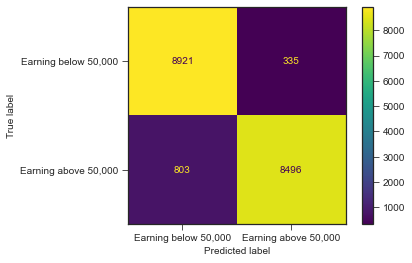

In [124]:
clf_svm = SVC(C=4.745401188473625,gamma=0.07969454818643928)
clf_svm.fit(X_train_os, y_train_os)
predict_svm_os_cv = clf_svm.predict(X_test_os)
plot_confusion_matrix(clf_svm,X_test_os,y_test_os,values_format='d',
                      display_labels=["Earning below 50,000","Earning above 50,000"])

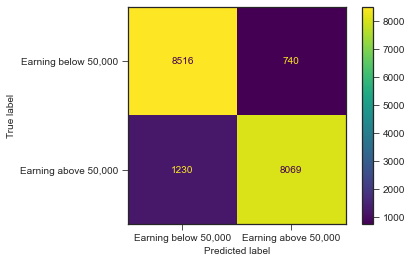

In [126]:
clf_svm = SVC(C=8.31993941811405,gamma=0.015751320499779724)
clf_svm.fit(X_train_scaled_sm,y_train_sm)
predict_svm_sm_cv = clf_svm.predict(X_test_scaled_sm)
auc_svm_sm_cv = roc_auc_score(y_test_sm, predict_svm_sm_cv)
plot_confusion_matrix(clf_svm,X_test_scaled_sm,y_test_sm,values_format='d',
                      display_labels=["Earning below 50,000","Earning above 50,000"])

[16:23:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


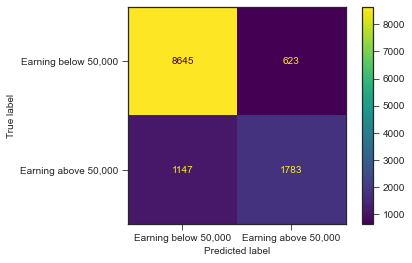

In [127]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train_scaled, y_train)
predict_xgb_cv = xgb.predict(X_test_scaled)
auc_xgb_cv = roc_auc_score(y_test, predict_xgb_cv)
plot_confusion_matrix(xgb,X_test_scaled,y_test,values_format='d',
                      display_labels=["Earning below 50,000","Earning above 50,000"])

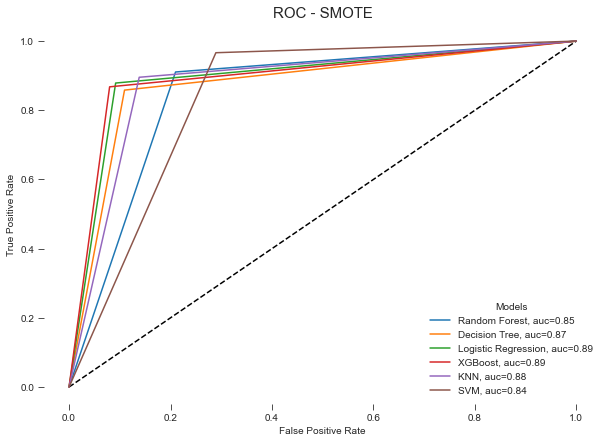

In [128]:
fpr1, tpr1, _ = metrics.roc_curve(y_test_sm, predict_tree_sm_cv)
fpr2, tpr2, _ = metrics.roc_curve(y_test_sm, predict_knn_sm_cv)
fpr3, tpr3, _ = metrics.roc_curve(y_test_sm, predict_log_sm_cv)
fpr4, tpr4, _ = metrics.roc_curve(y_test_sm, predict_svm_sm_cv)
fpr5, tpr5, _ = metrics.roc_curve(y_test_sm, predict_rf_sm_cv)
fpr6, tpr6, _ = metrics.roc_curve(y_test_sm, predict_xgb_sm_cv)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc_DT_sm_cv,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc_knn_sm_cv,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc_log_sm_cv,2)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc_svm_sm_cv,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc_rf_sm_cv,2)))
plt.plot(fpr6,tpr6,label="SVM, auc="+str(round(auc_xgb_sm_cv,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SMOTE', size=15)
plt.box(False)

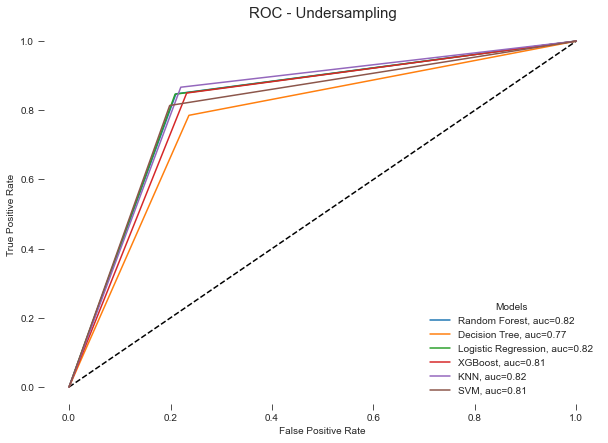

In [131]:
fpr1, tpr1, _ = metrics.roc_curve(y_test_us, predict_tree_us_cv)
fpr2, tpr2, _ = metrics.roc_curve(y_test_us, predict_knn_us_cv)
fpr3, tpr3, _ = metrics.roc_curve(y_test_us, predict_log_us_cv)
fpr4, tpr4, _ = metrics.roc_curve(y_test_us, predict_svm_us_cv)
fpr5, tpr5, _ = metrics.roc_curve(y_test_us, predict_rf_us_cv)
fpr6, tpr6, _ = metrics.roc_curve(y_test_us, predict_xgb_us_cv)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc_DT_us_cv,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc_knn_us_cv,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc_log_us_cv,2)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc_svm_us_cv,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc_rf_us_cv,2)))
plt.plot(fpr6,tpr6,label="SVM, auc="+str(round(auc_xgb_us_cv,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Undersampling', size=15)
plt.box(False)

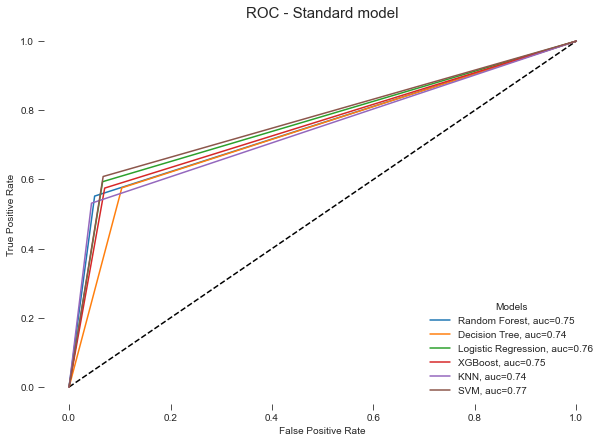

In [132]:
fpr1, tpr1, _ = metrics.roc_curve(y_test, predict_tree_cv)
fpr2, tpr2, _ = metrics.roc_curve(y_test, predict_knn_cv)
fpr3, tpr3, _ = metrics.roc_curve(y_test, predict_log_cv)
fpr4, tpr4, _ = metrics.roc_curve(y_test, predict_svm_cv)
fpr5, tpr5, _ = metrics.roc_curve(y_test, predict_rf_cv)
fpr6, tpr6, _ = metrics.roc_curve(y_test, predict_xgb_cv)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc_DT_cv,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc_knn_cv,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc_log_cv,2)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc_svm_cv,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc_rf_cv,2)))
plt.plot(fpr6,tpr6,label="SVM, auc="+str(round(auc_xgb_cv,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Standard model', size=15)
plt.box(False)


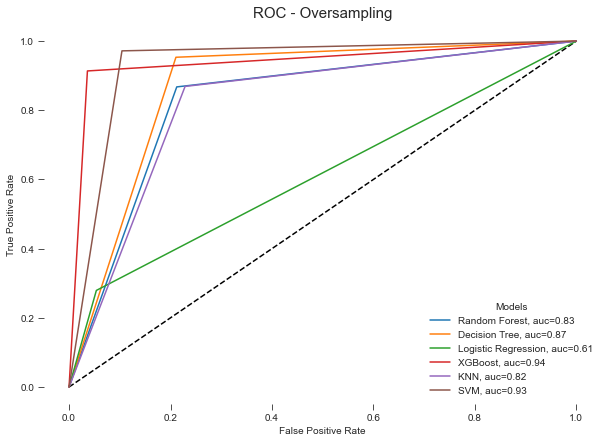

In [134]:
fpr1, tpr1, _ = metrics.roc_curve(y_test_os, predict_tree_os_cv)
fpr2, tpr2, _ = metrics.roc_curve(y_test_os, predict_knn_os_cv)
fpr3, tpr3, _ = metrics.roc_curve(y_test_os, predict_log_os_cv)
fpr4, tpr4, _ = metrics.roc_curve(y_test_os, predict_svm_os_cv)
fpr5, tpr5, _ = metrics.roc_curve(y_test_os, predict_rf_os_cv)
fpr6, tpr6, _ = metrics.roc_curve(y_test_os, predict_xgb_os_cv)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc_DT_os_cv,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc_knn_os_cv,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc_log_os_cv,2)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc_svm_os_cv,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc_rf_os_cv,2)))
plt.plot(fpr6,tpr6,label="SVM, auc="+str(round(auc_xgb_os_cv,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Oversampling', size=15)
plt.box(False)

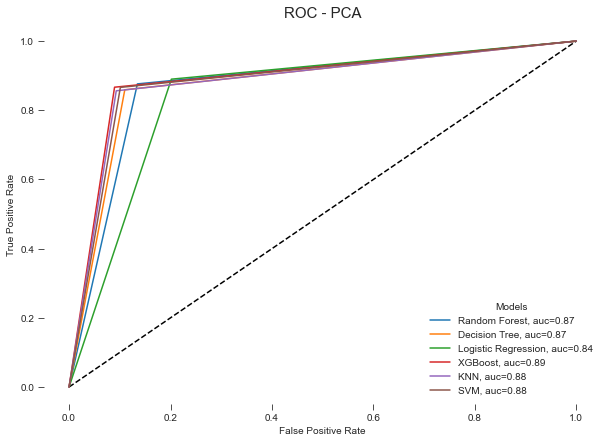

In [136]:
fpr1, tpr1, _ = metrics.roc_curve(y_test_sm, predict_tree_pca_cv)
fpr2, tpr2, _ = metrics.roc_curve(y_test_sm, predict_knn_pca_cv)
fpr3, tpr3, _ = metrics.roc_curve(y_test_sm, predict_log_pca_cv)
fpr4, tpr4, _ = metrics.roc_curve(y_test_sm, predict_svm_pca_cv)
fpr5, tpr5, _ = metrics.roc_curve(y_test_sm, predict_rf_pca_cv)
fpr6, tpr6, _ = metrics.roc_curve(y_test_sm, predict_xgb_pca_cv)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc_DT_pca_cv,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc_knn_pca_cv,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc_log_pca_cv,2)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc_svm_pca_cv,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc_rf_pca_cv,2)))
plt.plot(fpr6,tpr6,label="SVM, auc="+str(round(auc_xgb_pca_cv,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - PCA', size=15)
plt.box(False)

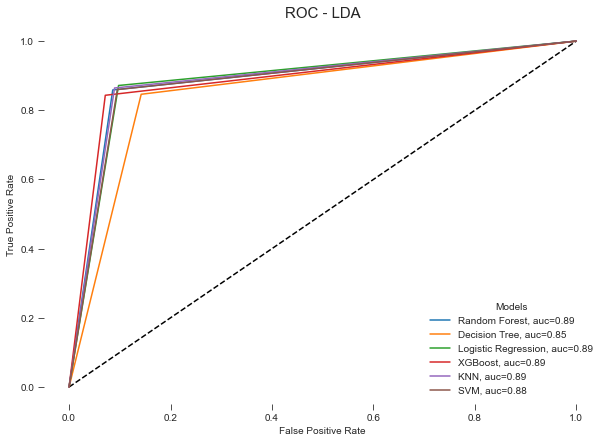

In [137]:
fpr1, tpr1, _ = metrics.roc_curve(y_test_sm, predict_tree_lda_cv)
fpr2, tpr2, _ = metrics.roc_curve(y_test_sm, predict_knn_lda_cv)
fpr3, tpr3, _ = metrics.roc_curve(y_test_sm, predict_log_lda_cv)
fpr4, tpr4, _ = metrics.roc_curve(y_test_sm, predict_svm_lda_cv)
fpr5, tpr5, _ = metrics.roc_curve(y_test_sm, predict_rf_lda_cv)
fpr6, tpr6, _ = metrics.roc_curve(y_test_sm, predict_xgb_lda_cv)
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc_DT_lda_cv,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc_knn_lda_cv,2)))
plt.plot(fpr3,tpr3,label="Logistic Regression, auc="+str(round(auc_log_lda_cv,2)))
plt.plot(fpr4,tpr4,label="XGBoost, auc="+str(round(auc_svm_lda_cv,2)))
plt.plot(fpr5,tpr5,label="KNN, auc="+str(round(auc_rf_lda_cv,2)))
plt.plot(fpr6,tpr6,label="SVM, auc="+str(round(auc_xgb_lda_cv,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - LDA', size=15)
plt.box(False)